In [11]:
# Libraries
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns


# Notebook display options
pd.set_option('display.max_columns', None)

# Install packages
%pip install rapidfuzz
%pip install unidecode


import unidecode
from rapidfuzz import fuzz, process

from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_absolute_error


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Shape of dataset: (40906, 36)

Data types:
 Bar_For_Salad             int64
Coffee_Bar                int64
Florist                   int64
Frozen Area             float64
Grocery Area            float64
Is Recyclable?          float64
Meat Area               float64
Package weight          float64
Ready_Food                int64
Store Area              float64
Store_Cost              float64
Store_Sales             float64
Video_Store               int64
YearlyIncome_USD        float64
brand                    object
children_count          float64
cost                    float64
customer_city_clean      object
customer_lat_val        float64
customer_lng_val        float64
customer_state_clean     object
department               object
education                object
gender                   object
grossWeight_kg          float64
marital_status           object
netWeight_kg            float64
occupation               o

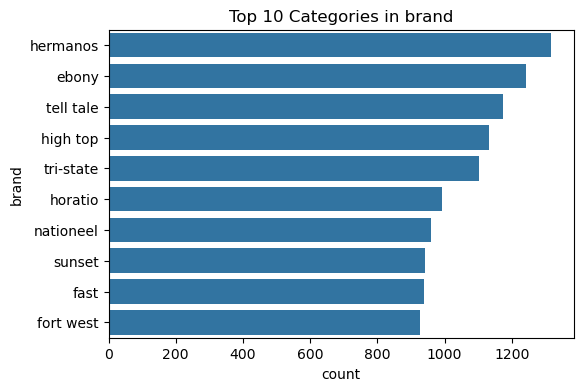

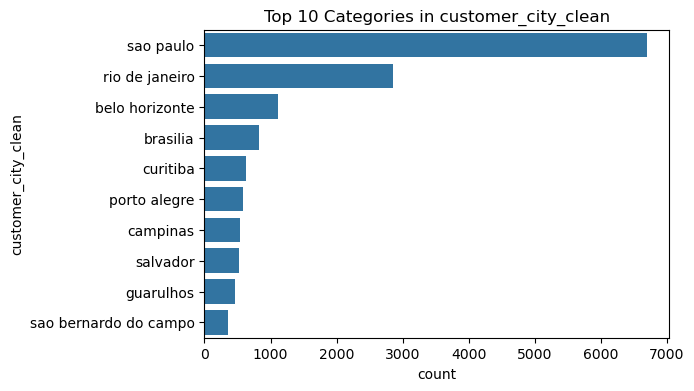

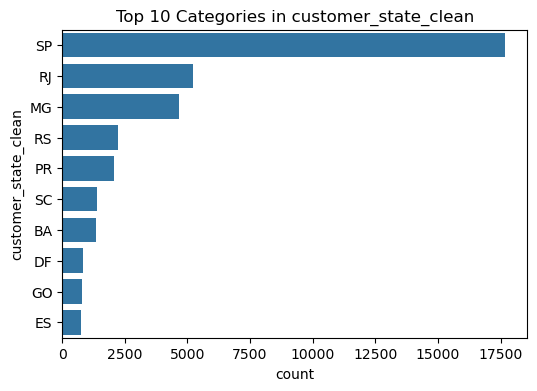

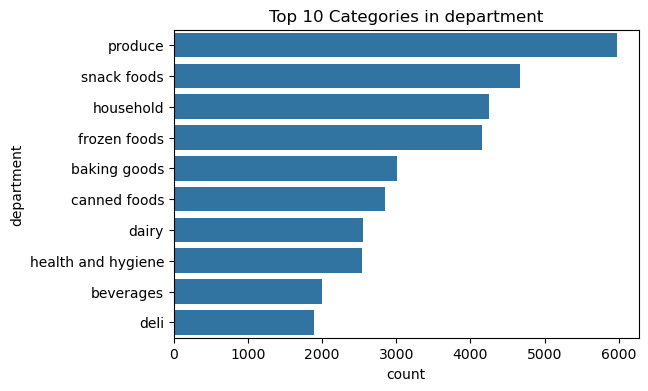

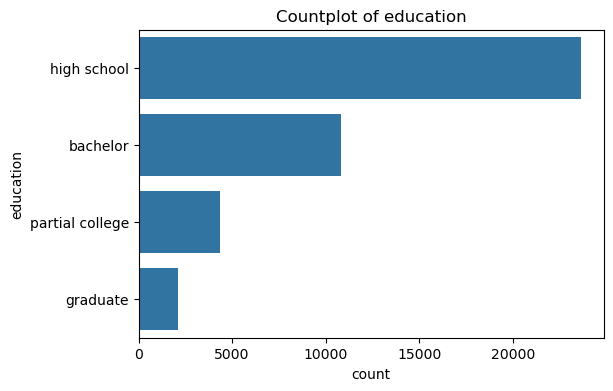

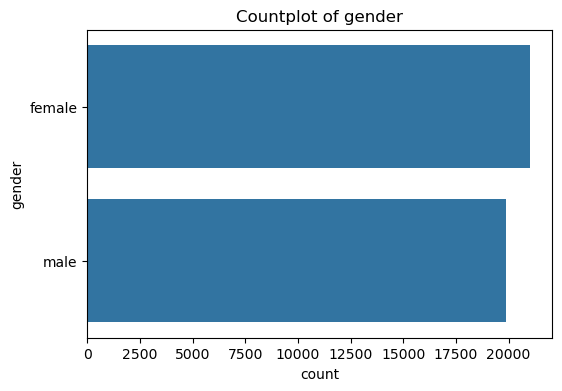

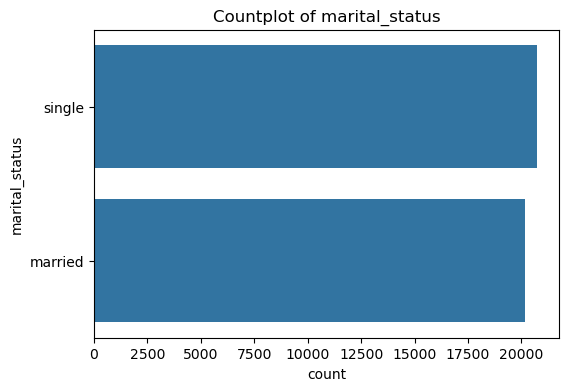

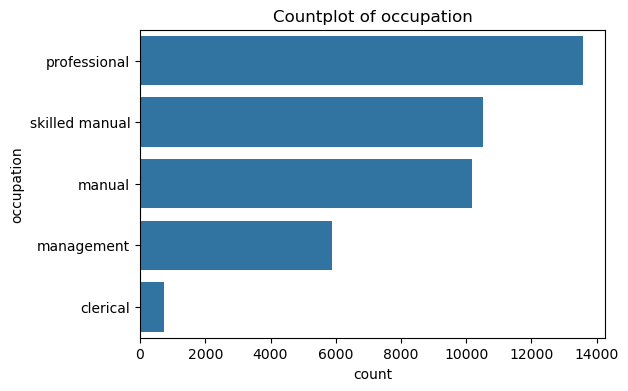

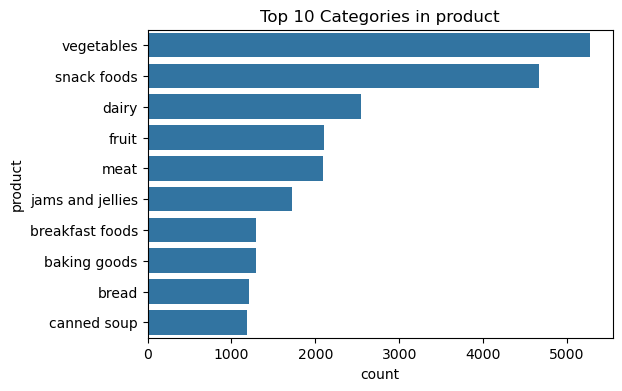

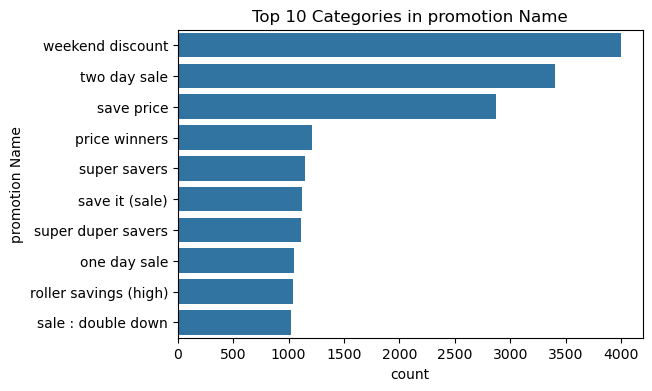

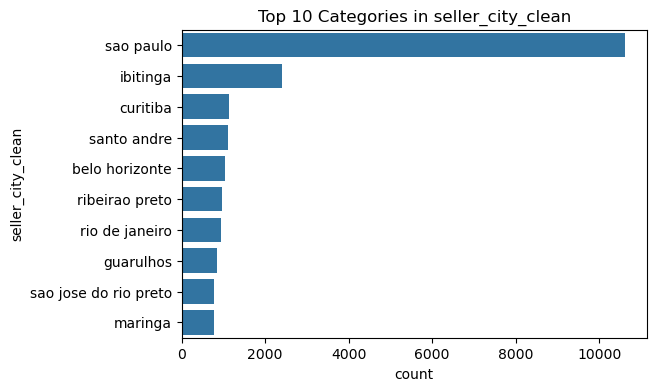

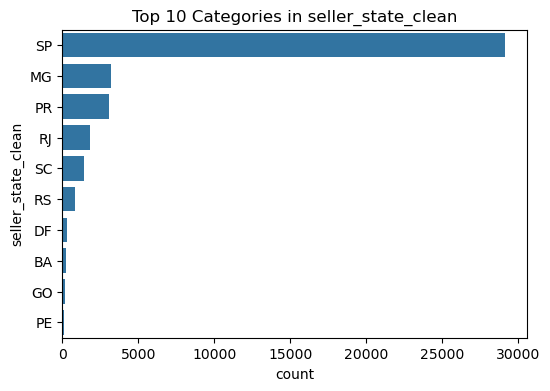

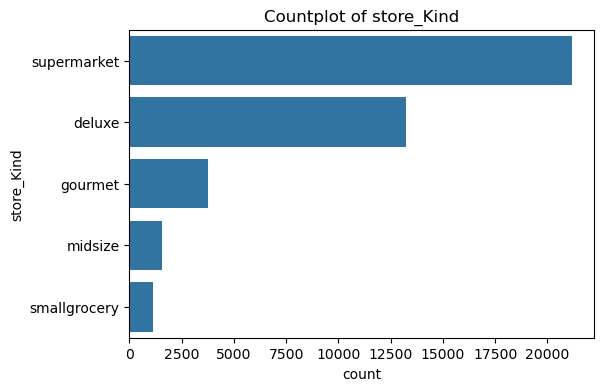

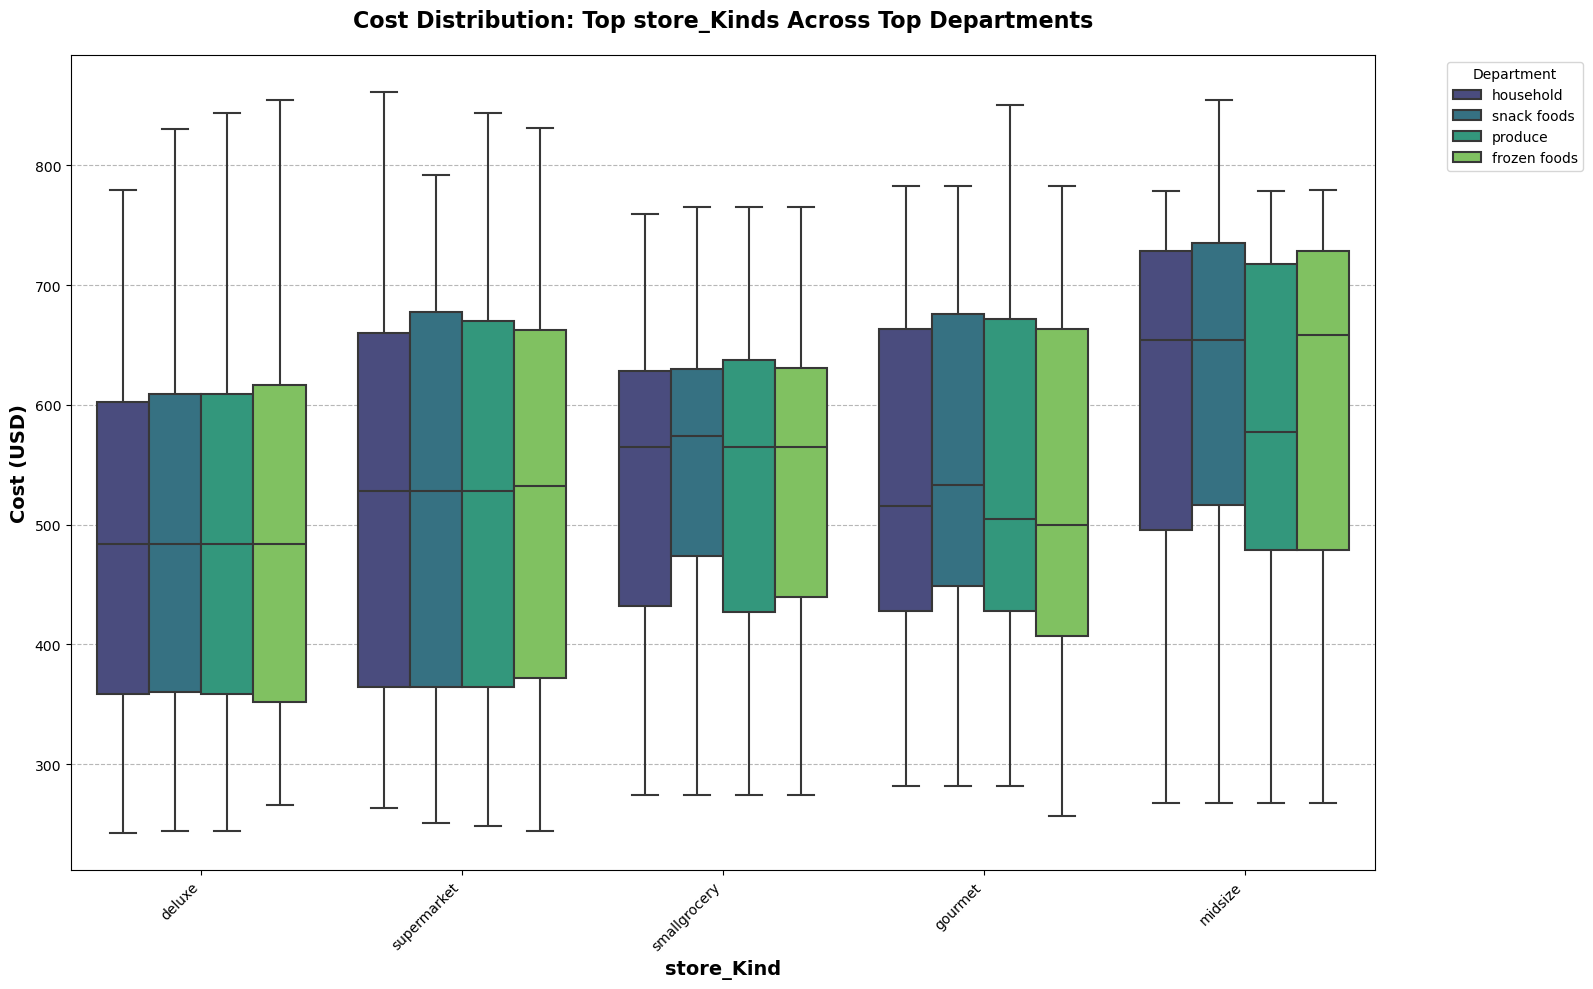

Shape of dataset: (40906, 36)

Data types:
 Bar_For_Salad             int64
Coffee_Bar                int64
Florist                   int64
Frozen Area             float64
Grocery Area            float64
Is Recyclable?          float64
Meat Area               float64
Package weight          float64
Ready_Food                int64
Store Area              float64
Store_Cost              float64
Store_Sales             float64
Video_Store               int64
YearlyIncome_USD        float64
brand                    object
children_count          float64
cost                    float64
customer_city_clean      object
customer_lat_val        float64
customer_lng_val        float64
customer_state_clean     object
department               object
education                object
gender                   object
grossWeight_kg          float64
marital_status           object
netWeight_kg            float64
occupation               object
product                  object
promotion Name           obj

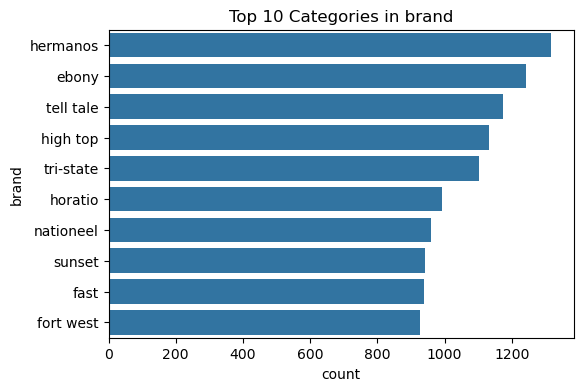

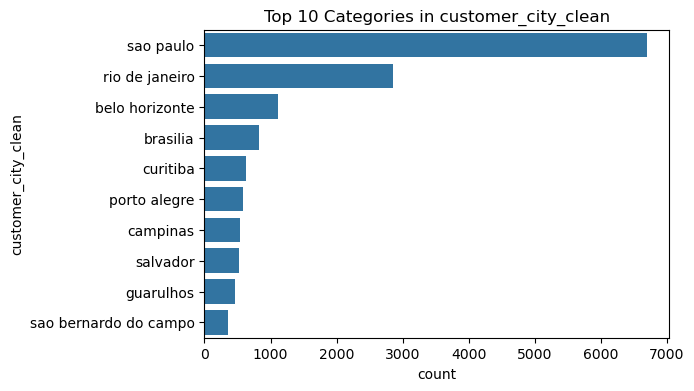

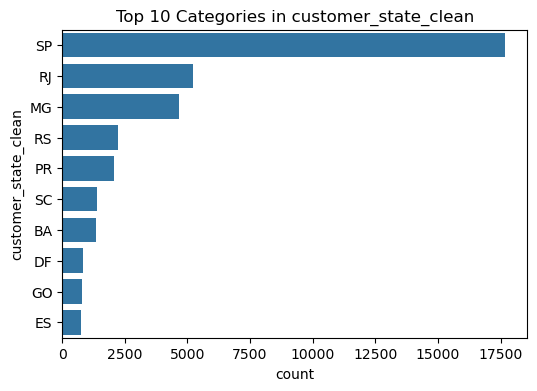

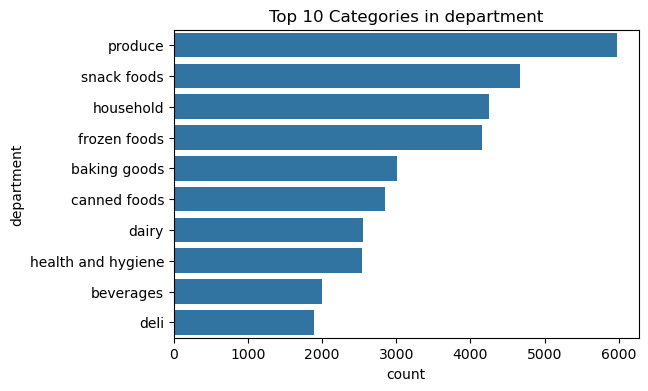

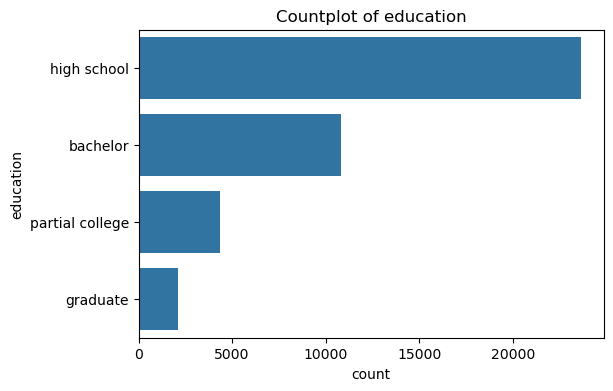

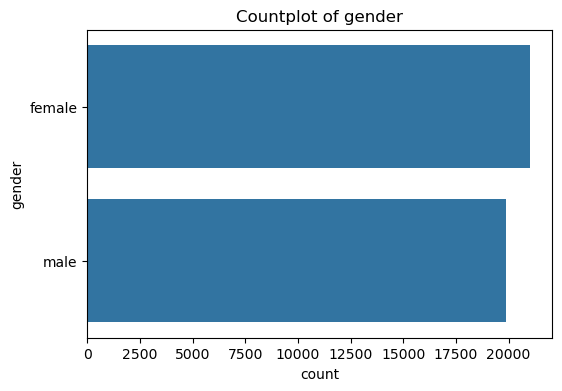

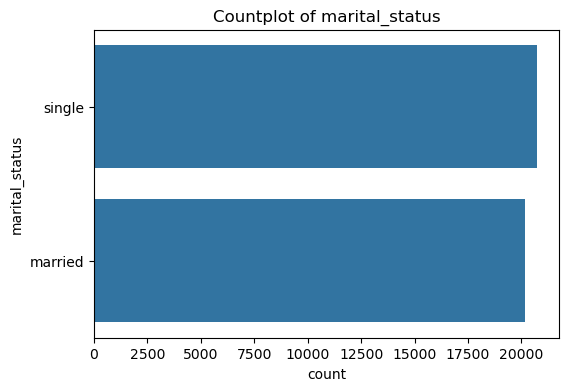

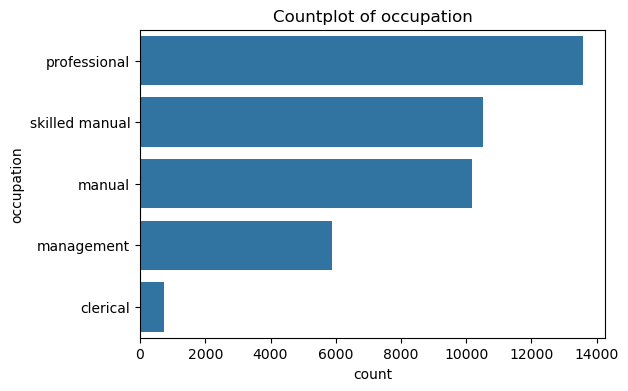

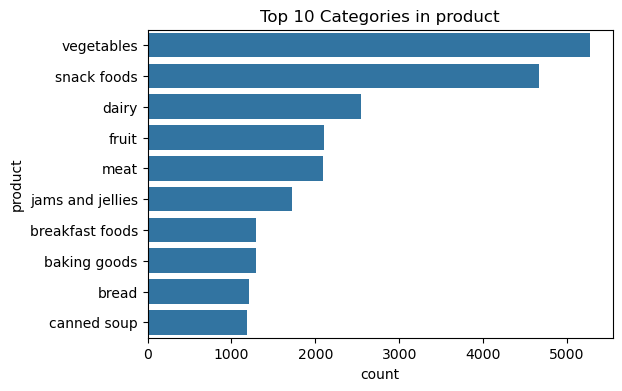

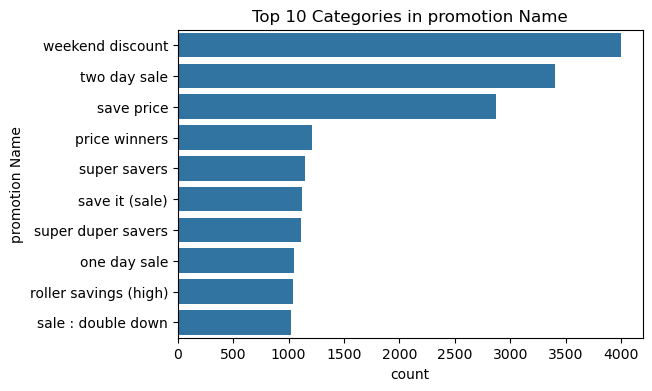

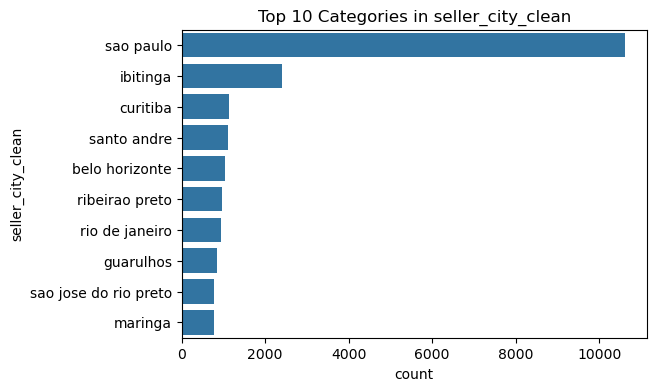

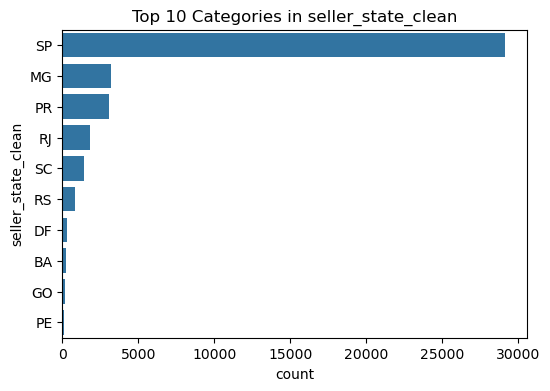

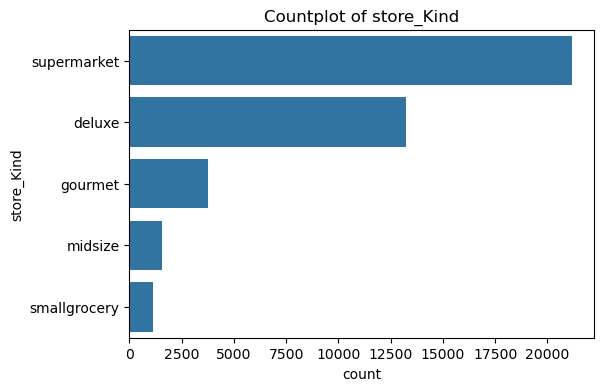

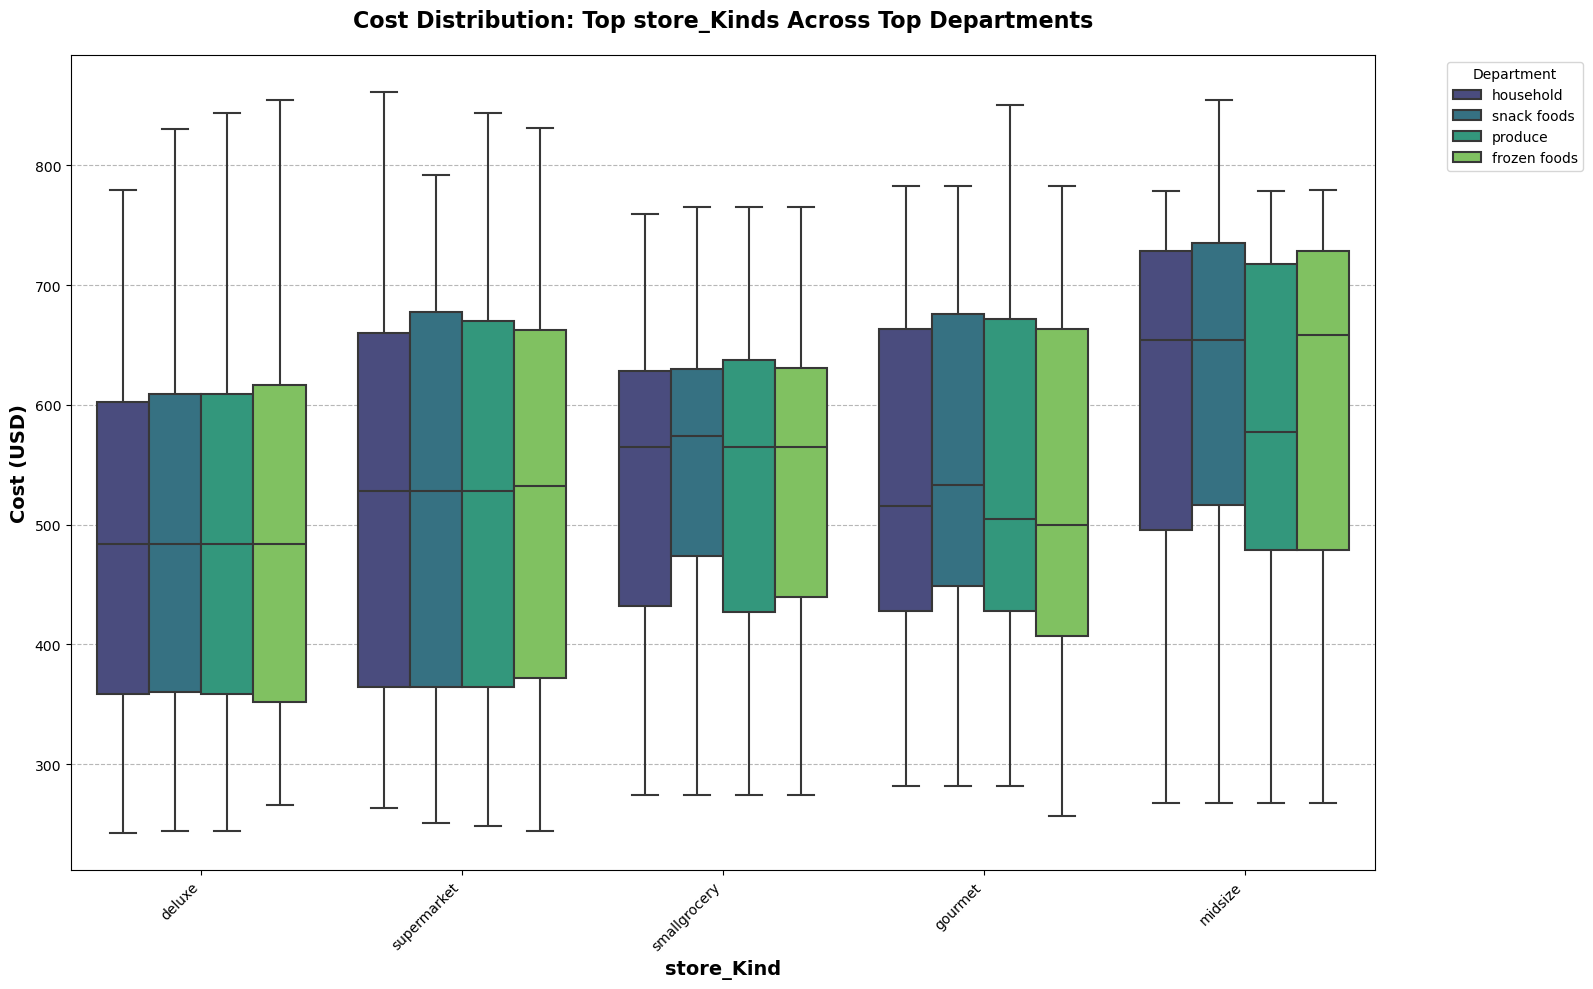

In [14]:
%pip install import-ipynb 
import import_ipynb
%run ./EDA.ipynb
from EDA import column_summary # to use the function column_summary from EDA notebook

In [2]:
df=pd.read_csv('/Users/habibaadawi/Documents/projects/ML_project/train_subset_1.csv')
df1=pd.read_csv('/Users/habibaadawi/Documents/projects/ML_project/train_subset_2.csv')
df2=pd.read_csv('/Users/habibaadawi/Documents/projects/ML_project/train_subset_3.csv')
df3=pd.read_csv('/Users/habibaadawi/Documents/projects/ML_project/train_subset_4.csv')
df_cities = pd.read_csv("/Users/habibaadawi/Documents/projects/ML_project/br-city-codes.csv")
df4=pd.read_csv('/Users/habibaadawi/Documents/projects/ML_project/test (1).csv')

In [16]:
#using this function on all dfs, all 4 batchs have the same cols and data types . 
# There some difference in the num of nan values 
column_summary(df)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,unnamed:0,object,9,10386,10378,"{'nil': 4, '-999': 4, 'To Be Determined': 2, '..."
1,personDescription,object,5,10390,3229,"{'Single Male with one child, education: bache..."
2,min.YearlyIncome,object,14,10381,94,"{'30K+': 2133, '10K+': 1427, '50K+': 1184, '70..."
3,customerOrder,object,7,10388,280,"{'Snack Foods from Snack Foods department, Ord..."
4,grossWeight,object,9,10386,1566,"{'25.0018': 86, '24.8564': 84, '28.9265': 81, ..."
5,netWeight,object,13,10382,1462,"{'23.5482': 142, '16.8617': 125, '15.4081': 12..."
6,isRecyclable?,object,11,10384,14,"{'recyclable': 5797, 'non recyclable': 4570, '..."
7,additionalFeaturesInMarket,object,2304,8091,162,"{'['Coffee Bar']': 1209, '['Florist']': 692, '..."
8,promotionName,object,1548,8847,61,"{'Weekend Discount': 367, 'Two Day Sale': 352,..."
9,storeKind,object,1520,8875,844,"{'Supermarket': 2218, 'Deluxe': 1912, 'Gourmet..."


I will create cleaning functions ,so I can use them all on each batch 

In [135]:
# this function will be used to clean all nan values 
def clean_global_missing_fuzzy(df, threshold=80, exclude_cols=[]):
    missing_values = [
        'nan', 'na', 'none', 'nil', 'missing', 'unknown', 'not available',
        'not specified', 'to be determined', 'tbd', '...', '??', '###',
        '-999', '-1', '--', '?', 'data missing','amount: nan','measure: nan','data: nan','val: nan'
    ]
    missing_values = [str(val).lower().strip() for val in missing_values]

     
    #change cols to lowercase and remove spaces from their strings 
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

    def is_missing(val):
        if pd.isna(val):
            return True
        
        val_str = str(val)
        #fuzzywuzzy was used here to compare it with the list of known missing indicators
        result = process.extractOne(val_str, missing_values, scorer=fuzz.token_sort_ratio)

        if result is None:
            return False
        
        match, score, *_ = result
        return score >= threshold
    
    #after removing all possible null strings, i replaced them with np.nan
    for col in df.columns:
        if col in exclude_cols:
            continue  
        df[col] = df[col].apply(lambda x: np.nan if is_missing(x) else x)

    return df


In [136]:
#for min.YearlyIncome column 
def clean_income_column_unified(df, col_name, col_name_clean='YearlyIncome_USD', eur_to_usd=1.10):

    def parse_income(x):
        if pd.isna(x):
            return np.nan

        val = str(x).lower().strip()


        val = val.replace('+','').replace('%','').replace(',','').replace('$','').replace('€','').replace(' ','')

        #converting EUR → USD
        currency_multiplier = eur_to_usd if '€' in str(x).lower() else 1

        #remove any thing that has month or mo, etc.
        is_monthly = 'monthly' in val or 'mo' in val
        val = val.replace('annually','').replace('monthly','').replace('mo','')

        #Handle multipliers like K and M
        multiplier = 1
        if 'k' in val or 'thousand' in val:
            multiplier = 1_000
            val = val.replace('k','').replace('thousand','')
        elif 'm' in val or 'million' in val:
            multiplier = 1_000_000
            val = val.replace('m','').replace('million','')

        #remove all nondigit chars
        val = re.sub(r'[^\d.]','', val)

        try:
            num = float(val) * multiplier * currency_multiplier
            if is_monthly:
                num *= 12
            return int(round(num))
        except:
            return np.nan

    df[col_name_clean] = df[col_name].apply(parse_income) 
    return df


In [137]:
def clean_and_convert_weight_column(df, col_name, col_name_clean=None):

    if col_name_clean is None:
        col_name_clean = col_name + '_clean'

    def convert_to_kg(val):
        if pd.isna(val):
            return np.nan

        val_str = str(val).lower()
        val_str = re.sub(r'\b\w+:\s*', '', val_str)
        match = re.search(r'-?\d+\.?\d*', val_str) # the val_str has to match a numeric value 
        if not match:
            return np.nan
        num = float(match.group())


        if 'kg' in val_str:
            return num
        elif 'gram' in val_str:
            return num / 1000
        elif 'lb' in val_str or 'lbs' in val_str:
            return num * 0.453592
        elif 'oz' in val_str:
            return num * 0.0283495
        else:
            return num

    df[col_name_clean] = df[col_name].apply(lambda x: abs(convert_to_kg(x)))
    return df




In [138]:
#can be used as a feature engineering to extract numerical values from object columns 
def extract_numeric_value(df, col_name, new_col_name=None, as_int=False):

    target_col = new_col_name if new_col_name else col_name

    def parse_numeric(val):
        if pd.isna(val):
            return np.nan

        val_str = str(val).lower().strip()

        val_str = re.sub(r'\b\w+:\s*', '', val_str)

        match = re.search(r'-?\d+\.?\d*', val_str)
        if not match:
            return np.nan

        num = float(match.group())
        return int(round(num)) if as_int else num

    df[target_col] = df[col_name].apply(parse_numeric)
    return df



In [139]:
correct_values = ['deluxe', 'supermarket', 'gourmet', 'midsize', 'smallgrocery']

def clean_store_kind(df, col_name, new_col_name='store_Kind', correct_values=correct_values, threshold=80):


    if correct_values is None:
        raise ValueError("you have to assign correct_values parameter")

    def correct_value(val):
        if pd.isna(val):
            return np.nan
        val_str = ''.join(e for e in str(val).lower() if e.isalpha()) # to make sure all chars are alphabtic
        match = process.extractOne(val_str, correct_values, scorer=fuzz.ratio) # this function returns a tuple --> (match, score, extra_info)
        if match and match[1] >= threshold: 
            return match[0]
        return val

    df[new_col_name] = df[col_name].apply(correct_value)
    return df


In [140]:
def clean_numeric_columns_inplace(df, columns):

    for col in columns:

        df[col] = df[col].astype(str).str.replace('"', '').str.strip()

        df[col] = pd.to_numeric(df[col], errors='coerce')


        became_null = df[df[col].isna()][col].dropna().unique()
        if len(became_null) > 0:
            print(f"Column: {col}")
            print(f"Unique values that became NaN after cleaning: {became_null}\n")

    return df


In [141]:
def clean_store_sales_inplace(df, col_name, new_col_name=None, eur_to_usd=1.10):

    target_col = new_col_name if new_col_name else col_name

    def parse_value(x):
        if pd.isna(x):
            return np.nan
        val = str(x).lower().strip()


        currency_multiplier = eur_to_usd if '€' in val else 1


        val = val.replace('$','').replace('€','')


        val = val.replace('millions','').replace('ms','').replace(',','')


        multiplier = 1
        if 'm' in val:
            multiplier = 1_000_000
            val = val.replace('m','')


        val = re.sub(r'[^\d.]','', val)

        try:
            return float(val) * multiplier * currency_multiplier
        except:
            return np.nan

    df[target_col] = df[col_name].apply(parse_value)
    return df




In [142]:

def clean_cost_column(df, col_name, new_col_name, eur_to_usd=1.10, gbp_to_usd=1.25, brl_to_usd=0.20):

    target_col = new_col_name

    def parse_value(x):
        if pd.isna(x):
            return np.nan
        val = str(x).lower().strip()


        if '€' in val:
            currency_multiplier = eur_to_usd
        elif '£' in val:
            currency_multiplier = gbp_to_usd
        elif 'r$' in val:
            currency_multiplier = brl_to_usd
        else:
            currency_multiplier = 1


        val = re.sub(r'(val:|data:|amount:|measure:)', '', val)
        val = val.replace('$','').replace('€','').replace('£','').replace('r$','').replace(',','')


        val = re.sub(r'[^\d.]','', val)

        try:
            return float(val) * currency_multiplier
        except:
            return np.nan

    df[target_col] = df[col_name].apply(parse_value)
    return df





In [143]:


def clean_review_score(df, col_name, new_col_name=None):

    target_col = new_col_name if new_col_name else col_name

    def parse_review(x):
        if pd.isna(x):
            return np.nan
        val = str(x).lower().strip()


        val = re.sub(r'(val:|data:|amount:|measure:|rating:)', '', val).strip()


        val = val.replace('stars','').strip()


        if '/' in val:
            try:
                num, denom = val.split('/')
                return round(float(num) / float(denom) * 5, 2)
            except:
                return np.nan


        if '%' in val:
            try:
                number = float(val.replace('%','').strip())
                return round(number / 20, 2)
            except:
                return np.nan


        try:
            return float(val)
        except:
            return np.nan

    df[target_col] = df[col_name].apply(parse_review)
    return df





In [144]:
def clean_person_description_fuzzy(df, col_name="personDescription", threshold=60):

    marital_options = ["married", "single"]
    gender_options = ["female", "male"]
    education_options = ["high school", "partial college", "bachelor", "graduate"]
    occupation_options = ["skilled manual", "manual", "professional", "management", "clerical"]
    children_dict = {
        "no": 0,"one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10
    }

    def fuzzy_find_in_text(text, options):
        best = None
        best_score = 0
        for opt in options:
            score = fuzz.partial_ratio(opt, text) #loops through all options and updates the best score each time to eventually replace the ext with the option with the best score 
            if score > best_score and score >= threshold:
                best_score = score
                best = opt
        return best

    def parse_description(text):
        if pd.isna(text):
            return pd.Series([np.nan]*5)
        text_lower = text.lower()

        # marital_status
        marital = fuzzy_find_in_text(text_lower, marital_options)

        # gender
        gender = fuzzy_find_in_text(text_lower, gender_options)

        # children
        kids_match = re.search(r'(\d+|no|one|two|three|four|five|six|seven|eight|nine|ten)\s+(child|children|kids?)', text_lower)
        children = None
        if kids_match:
            k = kids_match.group(1)
            children = int(k) if k.isdigit() else children_dict.get(k, np.nan)

        # education
        edu = fuzzy_find_in_text(text_lower, education_options)

        # occupation
        occ = fuzzy_find_in_text(text_lower, occupation_options)

        return pd.Series([marital, gender, children, edu, occ])

    df[["marital_status", "gender", "children_count", "education", "occupation"]] = df[col_name].apply(parse_description)
    return df

In [145]:


def clean_customer_order(df, col_name="customerOrder"):
    def parse_order(text):
        if pd.isna(text):
            return pd.Series([np.nan, np.nan, np.nan])



        product_match = re.search(r"^(.*?)\s+from", text, re.IGNORECASE)
        product = product_match.group(1).strip() if product_match else np.nan


        dept_match = re.search(r"from\s+(.*?)\s+department", text, re.IGNORECASE)
        department = dept_match.group(1).strip() if dept_match else np.nan


        brand_match = re.search(r"Ordered Brand\s*[:=\-]?\s*(.*)$", text, re.IGNORECASE)
        brand = brand_match.group(1).strip() if brand_match else np.nan

        return pd.Series([product, department, brand])

    df[["product", "department", "brand"]] = df[col_name].apply(parse_order)
    return df


In [146]:

def clean_additional_features(df, col_name="additionalFeaturesInMarket"):
    def parse_features(x):
        if pd.isna(x) or str(x).lower().strip() in ["data missing", "nan", "none", ""]:
            return []
        try:
            if isinstance(x, str):
                val = ast.literal_eval(x)
                if isinstance(val, list):
                    return [str(v).strip().title() for v in val]
            elif isinstance(x, list):
                return [str(v).strip().title() for v in x]
        except:
            return []
        return []


    df[col_name + "_clean"] = df[col_name].apply(parse_features)


    all_features = sorted({feat for feats in df[col_name + "_clean"] for feat in feats})


    for f in all_features:
        col_clean = f.replace(" ", "_")
        df[col_clean] = df[col_name + "_clean"].apply(lambda x: 1 if f in x else 0)

    return df


In [147]:


valid_cities_display = (
    df_cities['name']
    .str.lower()
    .apply(unidecode.unidecode)
    .str.strip()
    .tolist()
)

valid_cities = [
    city.replace(" ", "") for city in valid_cities_display
]


def clean_customer_city(df, city_cols, threshold=75):
    def normalize(x):
        if pd.isna(x):
            return np.nan

        city = re.sub(r"[^a-z\s]", " ", str(x).lower())
        city = re.sub(r"\s+", " ", city).strip()
        city = unidecode.unidecode(city)
        city_nospaces = city.replace(" ", "")


        result = process.extractOne(city_nospaces, valid_cities, scorer=fuzz.token_sort_ratio)
        if result:
            match, score, _ = result
            if score >= threshold:

                return valid_cities_display[valid_cities.index(match)]
        return np.nan

    for col in city_cols:
           if col in df.columns:
                df[col + "_clean"] = df[col ].apply(normalize)

    return df


In [148]:


valid_states = [
    "AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG",
    "PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"
]
valid_states_lower = [s.lower() for s in valid_states]

def clean_states(df, state_cols, threshold=60):

    def normalize(state):
        if pd.isna(state):
            return np.nan
        s = str(state).lower()
        s = unidecode.unidecode(s)


        replacements = {
            "5": "s", "0": "o", "@": "a", "$": "s", "ñ": "n", "ç": "c", "1": "i", "7": "t"
        }
        for k, v in replacements.items():
            s = s.replace(k, v)


        s = re.sub(r"[^a-z]", "", s)


        corrections = {
            "_rj": "rj", "_sp": "sp", "rj_": "rj", "sp_": "sp", "ba_": "ba",
            "_mg": "mg", "_ma": "ma", "_df": "df", "_ce": "ce", "_pe": "pe",
            "_rs": "rs", "_to": "to"
        }
        s = corrections.get(s, s)
        if s == "":
            return np.nan


        match = process.extractOne(s, valid_states_lower, scorer=fuzz.ratio)
        if match and match[1] >= threshold:
            return valid_states[valid_states_lower.index(match[0])]

        return np.nan


    for col in state_cols:
        if col in df.columns:
            df[col + "_clean"] = df[col ].apply(normalize)

    return df


Handling Outliers

In [149]:


def handle_outliers(df, cols=None, exclude_cols=[]):

    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    cols = [c for c in cols if c not in exclude_cols]

    for col in cols:
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0, 1}):
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df


In [150]:
def fill_missing(df, exclude_cols=[]):

    for col in df.columns:
        if col in exclude_cols:
            continue

        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
        elif pd.api.types.is_object_dtype(df[col]):

            try:
                mode_val = df[col].mode()[0]
            except IndexError:
                mode_val = 'unknown'
            df[col] = df[col].fillna(mode_val)
        else:

            continue

    return df


In [151]:
def clean_store_area(df, area_cols, store_col):

    df[store_col] = df[area_cols].sum(axis=1, skipna=True)


    for col in area_cols:
        other_cols = [c for c in area_cols if c != col]
        df[col] = df[col].fillna(df[store_col] - df[other_cols].sum(axis=1, skipna=True))


    for col in area_cols:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


    df[store_col] = df[area_cols].sum(axis=1)

    return df


In [152]:
def clean_all_weights(df, gross_col, net_col, package_col=None):

    if package_col is None:
        package_col = 'Package weight'


    if package_col not in df.columns:
        df[package_col] = df[gross_col] - df[net_col]


    df[gross_col] = df[gross_col].fillna(df[net_col] + df[package_col])

    df[net_col] = df[net_col].fillna(df[gross_col] - df[package_col])

    df[package_col] = df[package_col].fillna(df[gross_col] - df[net_col])


    for col in [gross_col, net_col, package_col]:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

    return df


Batch **1**

In [153]:
df.head()


,unnamed:0,personDescription,min.YearlyIncome,customerOrder,grossWeight,netWeight,isRecyclable?,additionalFeaturesInMarket,promotionName,storeKind,storeSales,storeCost,groceryArea,frozenArea,meatArea,cost,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score
0,mc_ID_0,"Single Female with four children, education: b...",$10K+,"Cleaning Supplies from Household department, O...",28.1997,-26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0
1,mc_ID_1,Single Female with three children and educatio...,€42K+,"Snack Foods from Snack Foods department, Order...",16.571,14.972,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0
2,mc_ID_2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30K+,"Magazines from Periodicals department, Ordered...",-28.6358,data: 27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0
3,mc_ID_3,"Single Female with three children, education: ...",30K+ annually,"Dairy from Dairy department, Ordered Brand : C...",14.2161,amount: 11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0
4,mc_ID_4,"Married Female with five children , education:...",50000,"Vegetables from Produce department, Ordered Br...",12.6172,9.71,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   unnamed:0                   10386 non-null  object
 1   personDescription           10390 non-null  object
 2   min.YearlyIncome            10381 non-null  object
 3   customerOrder               10388 non-null  object
 4   grossWeight                 10386 non-null  object
 5   netWeight                   10382 non-null  object
 6   isRecyclable?               10384 non-null  object
 7   additionalFeaturesInMarket  8091 non-null   object
 8   promotionName               8847 non-null   object
 9   storeKind                   8875 non-null   object
 10  storeSales                  10387 non-null  object
 11  storeCost                   10390 non-null  object
 12  groceryArea                 9364 non-null   object
 13  frozenArea                  9328 non-null   ob

In [155]:
df.isnull().sum()

unnamed:0                        9
personDescription                5
min.YearlyIncome                14
customerOrder                    7
grossWeight                      9
netWeight                       13
isRecyclable?                   11
additionalFeaturesInMarket    2304
promotionName                 1548
storeKind                     1520
storeSales                       8
storeCost                        5
groceryArea                   1031
frozenArea                    1067
meatArea                      1022
cost                            25
customer_city                    5
customer_state                   4
customer_lat                    32
customer_lng                    35
seller_city                     85
seller_state                    89
seller_lat                     102
seller_lng                      98
review_score                    78
dtype: int64

In [156]:
clean_global_missing_fuzzy(df)

,unnamed:0,personDescription,min.YearlyIncome,customerOrder,grossWeight,netWeight,isRecyclable?,additionalFeaturesInMarket,promotionName,storeKind,storeSales,storeCost,groceryArea,frozenArea,meatArea,cost,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score
0,mc_id_0,"single female with four children, education: b...",$10k+,"cleaning supplies from household department, o...",28.1997,-26.6008,recyclable,"['video store', 'florist', 'ready food', 'coff...",dimes off,deluxe,8.76 millions,4.2924 millions,2037.64,481.98,323,602.7575,florianopolis,5c,amount: -27.591715047463765,-48.506655980581606,navegantes,sc,-26.85907968190116,-48.63953562951828,5.0
1,mc_id_1,single female with three children and educatio...,€42k+,"snack foods from snack foods department, order...",16.571,14.972,non recyclable,NaN,budget bargains,supermarket,$6.36 millions,1.9716 millions,2049.72,457.36,NaN,708.665,abaete,mg,-19.16050583709177,-45.45377571289521,betim,mg,-19.95866259017359,-44.19878943272789,4.0
2,mc_id_2,"married male with two children,education: high...",30k+,"magazines from periodicals department, ordered...",-28.6358,data: 27.1822,recyclable,['florist'],shelf emptiers,supermarket,10.86 millions,4.4526 millions,1322.21,523.32,348.85,val: 564.2647,sao paulo,sp,data: -23.50609758451153,-46.73241237719997,praie grande,$p,-24.026786758814687,-46.49304889148245,5.0
3,mc_id_3,"single female with three children, education: ...",30k+ annually,"dairy from dairy department, ordered brand : c...",14.2161,amount: 11.2944,recyclable,['coffee bar'],savings galore,NaN,1.98 millions,0.6732 millions,NaN,440.92,293.95,724.5119,sao paulo,sp,-23.665780780743223,-46.6821276135092,sao paulo,sp,-23.69289565500035,-46.68021046531817,1.0
4,mc_id_4,"married female with five children , education:...",50000,"vegetables from produce department, ordered br...",12.6172,9.71,non recyclable,"['bar for salad', 'ready food', 'coffee bar', ...",sale winners,deluxe,"11.56 ,000,000illions",4.9708 millions,1872.19,593.93,395.95,519.7574,capivari,sp,-23.0122137105142,-47.52203973160603,sao paulo,sp,val: -23.539824031911863,-46.434679443937874,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,mc_id_10390,"married female with four children, education: ...",30k+,"eggs from eggs department, ordered brand : giant",13.155,10.2478,non recyclable,NaN,save it (sale),NaN,$5.13 millions,2.565 millions,2047.28,457.36,306.05,467.4051,sao pau1o,$p,-23.715914526390176,-46.7819351646447,tupa,sp,-21.93532101918528,-50.49756182976886,1.0
10391,mc_id_10391,"married male with three kids, education: parti...",10k,"electrical from household department, ordered ...",31.3976,29.944,non recyclable,"['video store', 'florist', 'ready food', 'bar ...",fantastic discounts,gourmet,6.51 millions,2.7993 millions,1426.33,465.54,310.3,718.9158,feira de sañtana,ba,-12.225319704968523,-38.94806634596223,maua,sp,-23.656676689970634,-46.44420755410021,4.0
10392,mc_id_10392,"married female with five children, education: ...",30k+,"hot beverages from beverages department, order...",25.0018,22.0946,non recyclable,['florist'],save it (sale),supermark3t,3.36 millions,1.4784 millions,1320.15,NaN,348.85,427.7617,campinas,sp,-22.92991227115403,data: -47.07189552530681,piracicaba,$p,-22.71683928585045,-47.65736585405934,5.0
10393,mc_id_10393,"married female with three children, education:...",10000,"electrical from household department, ordered ...",-24.275,19.9142,recyclable,"['bar for salad', 'coffee bar', 'ready food', ...",two day sale,gourmet,"4.92 ,000,000illions",1.968 millions,1424.85,465.54,310.3,663.5824,sao paulo,sp,-23.61662227782904,-46.515106571469765,ribeir4o preto,5p,-21.17121748495008,-47.81941847157649,3.0


In [157]:
Area_cols = ['groceryArea', 'frozenArea', 'meatArea']

In [158]:

df = clean_income_column_unified(df, 'min.YearlyIncome')
df = clean_and_convert_weight_column(df, 'grossWeight', col_name_clean='grossWeight_kg')
df = clean_and_convert_weight_column(df, 'netWeight', col_name_clean='netWeight_kg')
df = extract_numeric_value(df, 'customer_lat', new_col_name='customer_lat_val')
df = extract_numeric_value(df, 'customer_lng', new_col_name='customer_lng_val')
df = extract_numeric_value(df, 'seller_lat', new_col_name='seller_lat_val')
df = extract_numeric_value(df, 'seller_lng', new_col_name='seller_lng_val')
df = clean_store_kind(df, 'storeKind',correct_values=correct_values)
df = clean_numeric_columns_inplace(df, Area_cols)
df = clean_store_sales_inplace(df, 'storeSales', new_col_name='Store_Sales')
df = clean_store_sales_inplace(df, 'storeCost', new_col_name='Store_Cost')
df = clean_cost_column(df, 'cost',new_col_name='cost_usd')
df = clean_review_score(df, 'review_score', new_col_name='review_Score')
df = clean_person_description_fuzzy(df, "personDescription")
df = clean_customer_order(df, "customerOrder")
df = clean_additional_features(df, "additionalFeaturesInMarket")
df = clean_customer_city(df, city_cols=["customer_city","seller_city"])
df = clean_states(df, state_cols=["customer_state", "seller_state"])


In [159]:
df = df.drop(columns=[
    'unnamed:0', 'personDescription', 'min.YearlyIncome', 'customerOrder',
    'grossWeight', 'netWeight', 'additionalFeaturesInMarket',
    'storeKind', 'storeSales', 'storeCost',
    'cost', 'customer_city', 'customer_state', 'customer_lat', 'customer_lng',
    'seller_city', 'seller_state', 'seller_lat', 'seller_lng', 'review_score','additionalFeaturesInMarket_clean'
])


In [160]:
Weight_cols=['grossWeight_kg','netWeight_kg']

In [161]:
df = fill_missing(df, exclude_cols=Area_cols+Weight_cols)

In [162]:
df = clean_all_weights(df, 'grossWeight_kg', 'netWeight_kg')

In [163]:

for col in Area_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [164]:
df['Store Area']=df[['groceryArea', 'frozenArea', 'meatArea']].sum(axis=1)

In [165]:
df=df.rename(columns={
    'groceryArea': 'Grocery Area',
    'frozenArea': 'Frozen Area',
    'meatArea': 'Meat Area',
    'promotionName' : 'promotion Name',
    'isRecyclable?' : 'Is Recyclable?'
})


In [166]:
df.duplicated().sum()

0

In [167]:
df['Is Recyclable?']=df['Is Recyclable?'].map({'recyclable':1,'non recyclable':0})

Batch 2

In [168]:
df1.head()

,field_unnamed:_0,field_person_description,min__yearly_income,customer_order,is_recyclable?,additional_features_in_market,field_promotion_name,store_kind,store_sales,store_cost,grocery_area,store_area,frozen_area,meat_area,cost,field_customer_city,customer_state,customer_lat,customer_lng,field_seller_city,seller_state,seller_lat,seller_lng,review_score,weights
0,mc_ID_10395,"Married Male with four children, education: pa...",10K+,Carbonated Beverages from Beverages department...,recyclable,"['Bar For Salad', 'Coffee Bar', 'Ready Food', ...",Not Specified,Deluxe,5.24Ms,2.4628 Millions,NaN,2572.86,503.07,334.51,290.7357,sao paulu,Sp\n,-23.56910958090484,-46.57235346003806,m@ringa,PR,val: -23.42880633856904,-51.97183135000928,5.0,"{'gross': val: 10.5822, 'net': 7.675}"
1,mc_ID_10396,"Single Male with four children, education: bac...",70K+,"Canned Shrimp from Canned Foods department, Or...",non recyclable,"['Ready Food', 'Bar For Salad', 'Coffee Bar', ...",Shelf Clearing Days,Gourmet,6.22 Millions,2.2392 Millions,1424.85,2200.59,465.54,310.3,533.2508,cachoeiras de macacu,RJ,-22.46501185656128,-42.657960353794586,belo horizonte,MG,-19.921126734952896,-43.94119674937962,1.0,"{'gross': 20.2049, 'net': data: 18.606}"
2,mc_ID_10397,"Married Female with three children, education:...",Income: 130K+,"Vegetables from Frozen Foods department, Order...",recyclable,"['Bar For Salad', 'Florist', 'Coffee Bar', 'Re...",Promo Big,Deluxe,4.38 Millions,1.8396 Millions,2057.14,3145.5,654.13,436.09,267.3576,teresina,PI,-5.055889969866429,-42.76615847343458,5anto andre,SP,-23.68645557285476,-46.52061165889549,1.0,"{'gross': val: 17.2978, 'net': 14.376}"
3,mc_ID_10398,"Single Male with four children, education: hig...",$110K+,"Frozen Desserts from Frozen Foods department, ...",recyclable,"['Coffee Bar', 'Florist', 'Ready Food', 'Video...",Lottery Cash Registerion,Deluxe,€2.4M,1.2255 Millions,1735.48,2575.08,503.07,336.07,313.0678,bras1lia,df_,-15.84372601762118,-48.11611031164195,joinvill3,SC,amount: -26.270134671231133,-48.80876106346335,amount: 5.0,"{'gross': 14.2597, 'net': 12.8062}"
4,mc_ID_10399,"Single Female with one child, education: parti...",10K+,"Specialty from Produce department, Ordered Bra...",recyclable,['Florist'],NaN,Supermarket,10.17 Millions,3.2544 Millions,1322.92,2189.1,523.32,348.85,689.3663,DRACENA,_SP,-21.4988715,-51.53786099999999,sao paulo,$P,-23.59798552039933,-46.55547278711988,val: 5.0,"{'gross': 25.2925, 'net': 22.24}"


In [169]:
def split_weights_comma(df, col_name='weights'):
    df[['gross','net']] = df[col_name].str.split(',', expand=True)
    return df


In [170]:
df1 = split_weights_comma(df1, 'weights')
df1[['gross','net']].head()


,gross,net
0,{'gross': val: 10.5822,'net': 7.675}
1,{'gross': 20.2049,'net': data: 18.606}
2,{'gross': val: 17.2978,'net': 14.376}
3,{'gross': 14.2597,'net': 12.8062}
4,{'gross': 25.2925,'net': 22.24}


In [171]:
df1.isnull().sum()

field_unnamed:_0                    6
field_person_description            6
min__yearly_income                  7
customer_order                      8
is_recyclable?                     11
additional_features_in_market    1989
field_promotion_name             1491
store_kind                       1515
store_sales                        11
store_cost                          6
grocery_area                     1064
store_area                       1050
frozen_area                      1035
meat_area                        1066
cost                               27
field_customer_city                 9
customer_state                      5
customer_lat                       33
customer_lng                       33
field_seller_city                  87
seller_state                       92
seller_lat                         98
seller_lng                        105
review_score                       70
weights                             0
gross                               0
net         

In [172]:
clean_global_missing_fuzzy(df1)

,field_unnamed:_0,field_person_description,min__yearly_income,customer_order,is_recyclable?,additional_features_in_market,field_promotion_name,store_kind,store_sales,store_cost,grocery_area,store_area,frozen_area,meat_area,cost,field_customer_city,customer_state,customer_lat,customer_lng,field_seller_city,seller_state,seller_lat,seller_lng,review_score,weights,gross,net
0,mc_id_10395,"married male with four children, education: pa...",10k+,carbonated beverages from beverages department...,recyclable,"['bar for salad', 'coffee bar', 'ready food', ...",NaN,deluxe,5.24ms,2.4628 millions,NaN,2572.86,503.07,334.51,290.7357,sao paulu,sp,-23.56910958090484,-46.57235346003806,m@ringa,pr,val: -23.42880633856904,-51.97183135000928,5.0,"{'gross': val: 10.5822, 'net': 7.675}",{'gross': val: 10.5822,'net': 7.675}
1,mc_id_10396,"single male with four children, education: bac...",70k+,"canned shrimp from canned foods department, or...",non recyclable,"['ready food', 'bar for salad', 'coffee bar', ...",shelf clearing days,gourmet,6.22 millions,2.2392 millions,1424.85,2200.59,465.54,310.3,533.2508,cachoeiras de macacu,rj,-22.46501185656128,-42.657960353794586,belo horizonte,mg,-19.921126734952896,-43.94119674937962,1.0,"{'gross': 20.2049, 'net': data: 18.606}",{'gross': 20.2049,'net': data: 18.606}
2,mc_id_10397,"married female with three children, education:...",income: 130k+,"vegetables from frozen foods department, order...",recyclable,"['bar for salad', 'florist', 'coffee bar', 're...",promo big,deluxe,4.38 millions,1.8396 millions,2057.14,3145.5,654.13,436.09,267.3576,teresina,pi,-5.055889969866429,-42.76615847343458,5anto andre,sp,-23.68645557285476,-46.52061165889549,1.0,"{'gross': val: 17.2978, 'net': 14.376}",{'gross': val: 17.2978,'net': 14.376}
3,mc_id_10398,"single male with four children, education: hig...",$110k+,"frozen desserts from frozen foods department, ...",recyclable,"['coffee bar', 'florist', 'ready food', 'video...",lottery cash registerion,deluxe,€2.4m,1.2255 millions,1735.48,2575.08,503.07,336.07,313.0678,bras1lia,df_,-15.84372601762118,-48.11611031164195,joinvill3,sc,amount: -26.270134671231133,-48.80876106346335,amount: 5.0,"{'gross': 14.2597, 'net': 12.8062}",{'gross': 14.2597,'net': 12.8062}
4,mc_id_10399,"single female with one child, education: parti...",10k+,"specialty from produce department, ordered bra...",recyclable,['florist'],NaN,supermarket,10.17 millions,3.2544 millions,1322.92,2189.1,523.32,348.85,689.3663,dracena,_sp,-21.4988715,-51.53786099999999,sao paulo,$p,-23.59798552039933,-46.55547278711988,val: 5.0,"{'gross': 25.2925, 'net': 22.24}",{'gross': 25.2925,'net': 22.24}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,mc_id_1345,"single male with four children, education: hig...",30k or more,"vegetables from frozen foods department, order...",no,[],price slashers,supermarket,3.24 m,1.3608 m,1623.48,NaN,NaN,227.33,val: 277.0331,pinhalzinho,sc,-26.841107282367645,-52.982327822317785,londrlna,pr,val: -23.32532644463037,-51.15843393839796,5.0,"{'gross': 14.4487, 'net': 11.527}",{'gross': 14.4487,'net': 11.527}
10391,mc_id_1346,"married male with three children, education: b...",50k+,"paper products from household department, orde...",no,"['bar for salad', 'florist', 'coffee bar', 'vi...",money savers,deluxe,$5.1 m,2.091 m,1871.16,2861.0,593.93,395.95,343.611,salvador,ba,-12.913056240603789,-38.428588370203535,nova friburgo,rj,-22.275728018449303,-42.534192608244,5.0,"{'gross': 26.31, 'net': 23.4028}",{'gross': 26.31,'net': 23.4028}
10392,mc_id_1347,"single female with five children, education: h...",50k+,"vegetables from produce department, ordered br...",yes,"['coffee bar', 'bar for salad', 'ready food', ...",two for one,deluxe,2.28 m,0.8436 m,NaN,3146.93,656.13,436.09,£228.42,tailandia,pa,-2.9477377371029228,-48.95380795560824,barueri,sp,data: -23.491791912543025,-46.94733309700014,5.0,"{'gross': 31.543, 'net': 28.6358}",{'gross': 31

In [173]:
Area_cols = ['grocery_area', 'frozen_area', 'meat_area','store_area']

In [174]:

df1 = clean_income_column_unified(df1, 'min__yearly_income')
df1 = clean_and_convert_weight_column(df1, 'gross', col_name_clean='grossWeight_kg')
df1 = clean_and_convert_weight_column(df1, 'net', col_name_clean='netWeight_kg')
df1 = extract_numeric_value(df1, 'customer_lat', new_col_name='customer_lat_val')
df1 = extract_numeric_value(df1, 'customer_lng', new_col_name='customer_lng_val')
df1 = extract_numeric_value(df1, 'seller_lat', new_col_name='seller_lat_val')
df1 = extract_numeric_value(df1, 'seller_lng', new_col_name='seller_lng_val')
df1 = clean_store_kind(df1, 'store_kind', correct_values=correct_values)
df1 = clean_numeric_columns_inplace(df1, Area_cols)
df1 = clean_store_sales_inplace(df1, 'store_sales', new_col_name='Store_Sales')
df1 = clean_store_sales_inplace(df1, 'store_cost', new_col_name='Store_Cost')
df1 = clean_cost_column(df1, 'cost',new_col_name='cost_usd')
df1 = clean_review_score(df1, 'review_score', new_col_name='review_Score')
df1 = clean_person_description_fuzzy(df1, "field_person_description")
df1 = clean_customer_order(df1, "customer_order")
df1 = clean_additional_features(df1, "additional_features_in_market")
df1 = clean_customer_city(df1, city_cols=["field_customer_city","field_seller_city"])
df1 = clean_states(df1, state_cols=["customer_state", "seller_state"])


In [175]:
df1 = df1.drop(columns=[
    'field_unnamed:_0', 'field_person_description', 'min__yearly_income', 'customer_order',
    'gross', 'net', 'additional_features_in_market',
    'store_kind', 'store_sales', 'store_cost', 'cost',
    'field_customer_city', 'customer_state', 'customer_lat', 'customer_lng',
    'field_seller_city', 'seller_state', 'seller_lat', 'seller_lng',
    'review_score', 'weights','additional_features_in_market_clean'
])


In [176]:
Weight_cols=['grossWeight_kg','netWeight_kg']

In [177]:
df1 = fill_missing(df1, exclude_cols=Area_cols+Weight_cols)

In [178]:
df1=df1.rename(columns={
    'grocery_area': 'Grocery Area',
    'frozen_area': 'Frozen Area',
    'meat_area': 'Meat Area',
    'store_area': 'Store Area',
    'field_promotion_name' : 'promotion Name',
    'is_recyclable?' : 'Is Recyclable?',
    'field_customer_city_clean': 'customer_city_clean',
    'field_seller_city_clean': 'seller_city_clean',

    })

In [179]:
df1=clean_store_area(df1, area_cols=['Grocery Area','Frozen Area','Meat Area'], store_col='Store Area')

In [180]:
df1=clean_all_weights(df1, 'grossWeight_kg', 'netWeight_kg')

In [181]:
df1.isnull().sum()

Is Recyclable?          0
promotion Name          0
Grocery Area            0
Store Area              0
Frozen Area             0
Meat Area               0
YearlyIncome_USD        0
grossWeight_kg          0
netWeight_kg            0
customer_lat_val        0
customer_lng_val        0
seller_lat_val          0
seller_lng_val          0
store_Kind              0
Store_Sales             0
Store_Cost              0
cost_usd                0
review_Score            0
marital_status          0
gender                  0
children_count          0
education               0
occupation              0
product                 0
department              0
brand                   0
Bar_For_Salad           0
Coffee_Bar              0
Florist                 0
Ready_Food              0
Video_Store             0
customer_city_clean     0
seller_city_clean       0
customer_state_clean    0
seller_state_clean      0
Package weight          0
dtype: int64

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Is Recyclable?        10395 non-null  object 
 1   promotion Name        10395 non-null  object 
 2   Grocery Area          10395 non-null  float64
 3   Store Area            10395 non-null  float64
 4   Frozen Area           10395 non-null  float64
 5   Meat Area             10395 non-null  float64
 6   YearlyIncome_USD      10395 non-null  float64
 7   grossWeight_kg        10395 non-null  float64
 8   netWeight_kg          10395 non-null  float64
 9   customer_lat_val      10395 non-null  float64
 10  customer_lng_val      10395 non-null  float64
 11  seller_lat_val        10395 non-null  float64
 12  seller_lng_val        10395 non-null  float64
 13  store_Kind            10395 non-null  object 
 14  Store_Sales           10395 non-null  float64
 15  Store_Cost         

In [183]:
df1.duplicated().sum()

0

In [184]:
df1['Is Recyclable?']=df1['Is Recyclable?'].map({'recyclable':1,'non recyclable':0})


Batch 3

In [185]:
df2.head()

,z153yi8,u5erb551yo,vbi5ustafos,v1sves1l,nj8d1js6mly,zw9u23wfoat,bslnykoygnx,ixet0uzuuoh,bcqe6tdkash,gnyebdyjsq,laedo3e,u3onbs8utn,910alza9eq,qvwwq8qe00,ykri3z1g,gds8lo,zy5q4ch85,snbu4rj,y02zr8iy,oep16bl,hvh8c4,fqs6141,vrhnlr48,v0zfxgo3xh8,47scottr,98nwv2,m8b70rwh
0,mc_ID_1350,"Married Female with four children, education: ...",30K+,"Dairy from Dairy department, Ordered Brand : G...",21.0771,18.17 kg,2.907200000000003,no,"['Ready Food', 'Bar For Salad', 'Coffee Bar', ...",Roller Savings (High),gourmet,2.67 M,0.801 M,1424.85,2200.69,465.54,310.26,499.7265,cardoso,SP,amount: -20.07337070860132,-49.91260766329853,bRasIlIA,DF,-15.656754584921352,data: -47.808582687413306,val: 4.0
1,mc_ID_1351,"Single Male with three children, education: pa...",30K+,"Fruit from Produce department, Ordered Brand :...",30.3801,27.3275,3.052599999999998,yes,['Florist'],You Save Days,supermarke7,5.7 M,2.223 M,NaN,2194.54,523.32,348.85,689.3663,_sao paulo,sp_,-23.666837080690684,-46.66437239509124,OSaSCO,SP,-23.552456794881493,-46.78012559033992,5.0
2,mc_ID_1352,"Married_Female_w/_three_children,_education:_B...",50K+,"Meat from Deli department, Ordered Brand : Cut...",val: nan,21.2225,NaN,no,['Coffee Bar'],NaN,Supermarket,5.97 M,1.9104 M,1238.65,1972.94,440.92,NaN,364.1649,Porto Alegre,RS,-30.02159907383571,-51.178723476398005,Ribeirao Preto,SP,-21.152969235356927,amount: -47.77227625506376,val: 5.0
3,mc_ID_1353,Married Female with one child and education: b...,50K or more,"Dairy from Dairy department, Ordered Brand : B...",31.543,28.6358,2.9072,no,"['Florist', 'Ready Food', 'Coffee Bar', 'Video...",Save Price,Deluxe,$9.66 M,3.0912 M,1736.78,2573.89,503.07,333.47,419.9167,lagoa da prata,MG,data: -20.022568491315106,-45.54469897672237,petropolis,Rj,-22.549033360244323,-43.210094724044055,5.0
4,mc_ID_1354,Married Female with four children / education:...,$10K+,"Fruit from Produce department, Ordered Brand :...",9.8699,6.9482,measure: 2.9216999999999995,no,"['Bar For Salad', 'Coffee Bar', 'Ready Food', ...",Sale : Double Down,Deluxe,15.76 M,6.9344 M,NaN,3145.5,NaN,436.09,500.7202,RIACHINHO,MG,amount: -16.223266212215982,-45.997340336760026,ASSIS,SP,-22.6796532539352,val: -50.44287891853987,5.0


In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   z153yi8      10390 non-null  object
 1   u5erb551yo   10388 non-null  object
 2   vbi5ustafos  10383 non-null  object
 3   v1sves1l     10390 non-null  object
 4   nj8d1js6mly  9189 non-null   object
 5   zw9u23wfoat  9172 non-null   object
 6   bslnykoygnx  8194 non-null   object
 7   ixet0uzuuoh  10383 non-null  object
 8   bcqe6tdkash  10387 non-null  object
 9   gnyebdyjsq   9349 non-null   object
 10  laedo3e      9357 non-null   object
 11  u3onbs8utn   10388 non-null  object
 12  910alza9eq   10390 non-null  object
 13  qvwwq8qe00   9333 non-null   object
 14  ykri3z1g     9350 non-null   object
 15  gds8lo       9363 non-null   object
 16  zy5q4ch85    9374 non-null   object
 17  snbu4rj      10387 non-null  object
 18  y02zr8iy     10387 non-null  object
 19  oep16bl      10385 non-nu

In [187]:
clean_global_missing_fuzzy(df2)

,z153yi8,u5erb551yo,vbi5ustafos,v1sves1l,nj8d1js6mly,zw9u23wfoat,bslnykoygnx,ixet0uzuuoh,bcqe6tdkash,gnyebdyjsq,laedo3e,u3onbs8utn,910alza9eq,qvwwq8qe00,ykri3z1g,gds8lo,zy5q4ch85,snbu4rj,y02zr8iy,oep16bl,hvh8c4,fqs6141,vrhnlr48,v0zfxgo3xh8,47scottr,98nwv2,m8b70rwh
0,mc_id_1350,"married female with four children, education: ...",30k+,"dairy from dairy department, ordered brand : g...",21.0771,18.17 kg,2.907200000000003,no,"['ready food', 'bar for salad', 'coffee bar', ...",roller savings (high),gourmet,2.67 m,0.801 m,1424.85,2200.69,465.54,310.26,499.7265,cardoso,sp,amount: -20.07337070860132,-49.91260766329853,brasilia,df,-15.656754584921352,data: -47.808582687413306,val: 4.0
1,mc_id_1351,"single male with three children, education: pa...",30k+,"fruit from produce department, ordered brand :...",30.3801,27.3275,3.052599999999998,yes,['florist'],you save days,supermarke7,5.7 m,2.223 m,NaN,2194.54,523.32,348.85,689.3663,_sao paulo,sp_,-23.666837080690684,-46.66437239509124,osasco,sp,-23.552456794881493,-46.78012559033992,5.0
2,mc_id_1352,"married_female_w/_three_children,_education:_b...",50k+,"meat from deli department, ordered brand : cut...",NaN,21.2225,NaN,no,['coffee bar'],NaN,supermarket,5.97 m,1.9104 m,1238.65,1972.94,440.92,NaN,364.1649,porto alegre,rs,-30.02159907383571,-51.178723476398005,ribeirao preto,sp,-21.152969235356927,amount: -47.77227625506376,val: 5.0
3,mc_id_1353,married female with one child and education: b...,50k or more,"dairy from dairy department, ordered brand : b...",31.543,28.6358,2.9072,no,"['florist', 'ready food', 'coffee bar', 'video...",save price,deluxe,$9.66 m,3.0912 m,1736.78,2573.89,503.07,333.47,419.9167,lagoa da prata,mg,data: -20.022568491315106,-45.54469897672237,petropolis,rj,-22.549033360244323,-43.210094724044055,5.0
4,mc_id_1354,married female with four children / education:...,$10k+,"fruit from produce department, ordered brand :...",9.8699,6.9482,measure: 2.9216999999999995,no,"['bar for salad', 'coffee bar', 'ready food', ...",sale : double down,deluxe,15.76 m,6.9344 m,NaN,3145.5,NaN,436.09,500.7202,riachinho,mg,amount: -16.223266212215982,-45.997340336760026,assis,sp,-22.6796532539352,val: -50.44287891853987,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,mc_id_11740,"single male with two children, education: bach...",50k+,"cleaning supplies from household department, o...",13.6492,10.7421,2.9071,no,"['coffee bar', 'ready food', 'florist', 'bar f...",shelf emptiers,guurmet,$7.38 m,3.3948 m,1563.7,2204.69,385.45,255.78,773.0986,sao paulo,sp,-23.564556880373964,-46.74788683028447,limeira,sp,-22.541719708891844,-47.427681190013296,4.0
10391,mc_id_11741,"single female with four kidren, education: par...",$90k+,decongestants from health and hygiene departme...,25.1472,23.5482,1.5990000000000002,yes,"['bar for salad', 'florist', 'video store', 'c...",save price,deluxe,1.62 m,0.486 m,1731.95,2577.81,503.07,335.38,419.9167,sao paulo,sp,-23.467425066333888,-46.70391530322004,franca,sp,-20.50234199999999,-47.4215895,5.0
10392,mc_id_11742,"married_male_with_five_kidren,_education:_high...",360+ monthly,"snack foods from snack foods department, order...",19.0421,17.5885,1.4536000000000016,yes,"['florist', 'ready food', 'coffee bar', 'video...",gld,deluxe,$9.42 m,3.4854 m,1871.16,2864.6,593.93,394.43,484.1411,cascavel,pr,-24.94812606272721,-53.45992279514128,contagem,mg,-19.849882697848685,amount: -44.02029046658248,5.0
10393,mc_id_11743,"married male with one child, education: partia...",10k+,"dairy from dairy department, ordered brand : c...",14.2452,9.8844,4.360800000000001,NaN,"['bar for salad', 'ready food']",three for one,supermarket,2.62 m,0.8646 m,2265.9,3688.49,853.22,567.0,618.4475,teresopolis,rj,-22.379789300034645,-42.92663232690309,araguari,mg,amount: -18.643784093954583,-48.20804381879092,4.0


In [188]:
Area_cols=['qvwwq8qe00', 'gds8lo', 'zy5q4ch85','ykri3z1g']

In [189]:

df2 = clean_income_column_unified(df2, 'vbi5ustafos')
df2 = clean_and_convert_weight_column(df2, 'zw9u23wfoat', col_name_clean='grossWeight_kg')
df2 = clean_and_convert_weight_column(df2, 'bslnykoygnx', col_name_clean='netWeight_kg')
df2 = clean_and_convert_weight_column(df2, 'nj8d1js6mly', col_name_clean='Package weight')
df2 = extract_numeric_value(df2, 'hvh8c4', new_col_name='customer_lat_val')
df2 = extract_numeric_value(df2, 'fqs6141', new_col_name='customer_lng_val')
df2 = extract_numeric_value(df2, '47scottr', new_col_name='seller_lat_val')
df2 = extract_numeric_value(df2, '98nwv2', new_col_name='seller_lng_val')
df2 = clean_store_kind(df2, 'laedo3e', correct_values=correct_values)
df2 = clean_numeric_columns_inplace(df2, Area_cols)
df2 = clean_store_sales_inplace(df2, 'u3onbs8utn', new_col_name='Store_Sales')
df2 = clean_store_sales_inplace(df2, '910alza9eq', new_col_name='Store_Cost')
df2 = clean_cost_column(df2, 'snbu4rj',new_col_name='cost_usd')
df2 = clean_review_score(df2, 'm8b70rwh', new_col_name='review_Score')
df2 = clean_person_description_fuzzy(df2, "u5erb551yo")
df2 = clean_customer_order(df2, "v1sves1l")
df2 = clean_additional_features(df2, "bcqe6tdkash")
df2 = clean_customer_city(df2, city_cols=["y02zr8iy","vrhnlr48"])
df2 = clean_states(df2, state_cols=["oep16bl", "v0zfxgo3xh8"])


In [190]:
df2 = df2.drop(columns=[
    'z153yi8', 'u5erb551yo', 'vbi5ustafos', 'v1sves1l','nj8d1js6mly',
    'zw9u23wfoat', 'bslnykoygnx', 'bcqe6tdkash', 'laedo3e', 'u3onbs8utn',
    '910alza9eq', 'snbu4rj', 'y02zr8iy', 'oep16bl', 'hvh8c4', 'fqs6141',
    'vrhnlr48', 'v0zfxgo3xh8', '47scottr', '98nwv2', 'm8b70rwh','bcqe6tdkash_clean'
])


In [191]:
df2=df2.rename(columns={
    'qvwwq8qe00': 'Grocery Area',
    'gds8lo': 'Frozen Area',
    'zy5q4ch85': 'Meat Area',
    'ykri3z1g': 'Store Area',
    'ixet0uzuuoh': 'Is Recyclable?',
    'gnyebdyjsq': 'promotion Name',
     'y02zr8iy_clean': 'customer_city_clean',
    'vrhnlr48_clean': 'seller_city_clean',
    'oep16bl_clean': 'customer_state_clean',
    'v0zfxgo3xh8_clean': 'seller_state_clean'

})


In [192]:
Weight_cols=['grossWeight_kg','netWeight_kg','Package weight']

In [193]:
df2=clean_all_weights(df2, 'grossWeight_kg', 'netWeight_kg',package_col='Package weight')

In [194]:
df2=clean_store_area(df2, area_cols=['Grocery Area','Frozen Area','Meat Area'], store_col='Store Area')

In [195]:
df2 = fill_missing(df2, exclude_cols=Area_cols+Weight_cols )

In [196]:
df2.isnull().sum()

Is Recyclable?          0
promotion Name          0
Grocery Area            0
Store Area              0
Frozen Area             0
Meat Area               0
YearlyIncome_USD        0
grossWeight_kg          0
netWeight_kg            0
Package weight          0
customer_lat_val        0
customer_lng_val        0
seller_lat_val          0
seller_lng_val          0
store_Kind              0
Store_Sales             0
Store_Cost              0
cost_usd                0
review_Score            0
marital_status          0
gender                  0
children_count          0
education               0
occupation              0
product                 0
department              0
brand                   0
Bar_For_Salad           0
Coffee_Bar              0
Florist                 0
Ready_Food              0
Video_Store             0
customer_city_clean     0
seller_city_clean       0
customer_state_clean    0
seller_state_clean      0
dtype: int64

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Is Recyclable?        10395 non-null  object 
 1   promotion Name        10395 non-null  object 
 2   Grocery Area          10395 non-null  float64
 3   Store Area            10395 non-null  float64
 4   Frozen Area           10395 non-null  float64
 5   Meat Area             10395 non-null  float64
 6   YearlyIncome_USD      10395 non-null  float64
 7   grossWeight_kg        10395 non-null  float64
 8   netWeight_kg          10395 non-null  float64
 9   Package weight        10395 non-null  float64
 10  customer_lat_val      10395 non-null  float64
 11  customer_lng_val      10395 non-null  float64
 12  seller_lat_val        10395 non-null  float64
 13  seller_lng_val        10395 non-null  float64
 14  store_Kind            10395 non-null  object 
 15  Store_Sales        

In [198]:
df2['Is Recyclable?']=df2['Is Recyclable?'].map({'yes':1,'no':0})

In [199]:
df2.duplicated().sum()

0

Batch 4

In [200]:
df3.head()

,Unnamed: 0,personDescription,min._yearly_income_info,data_customer_order,grossWeight,netWeight,is_recyclable?_field,additional_features_in_market_measure,PN,SK,store_sales,SC,GA,Store Area,field_frozen_area,field_meat_area,metric_cost,customer_city,CUS56,customer_lat,var_customer_lng,field_seller_city,seller_state,seller_lat_metric,seller_lng,REV54
0,mc_ID_11745,Single Male with three children + education: b...,50 Thousand,Bathroom Products from Health and Hygiene depa...,19.0421,14.6813,no,"['Ready Food', 'Bar For Salad', 'Florist', 'Co...",Roller Savings (High),Gourmet,4.47 M,1.3857 M,1566.86,2211.99,385.45,257.63,637.6939,caMpo ERE,sC,-26.39359270318612,-53.08265733215715,maringa,pr,-23.437975269077903,-51.91385959802448,1.0
1,mc_ID_11746,"Married Male with two children, education...",30K+,"Breakfast Foods from Frozen Foods department, ...",NaN,8.1837,no,"['Video Store', 'Bar For Salad', 'Ready Food',...",Bag Stuffer,Deluxa,$1.71 M,0.7524 M,1734.5,2575.43,503.07,335.38,662.2226,cURITIBa,PR,-25.48129914876794,-49.27064708076061,Belo Horizonte,SP,-19.81011863229108,-43.98472732006267,4.0
2,mc_ID_11747,"Married Female with one child, education: part...",10K+,"Vegetables from Frozen Foods department, Order...",21.2225,NaN,yes,['Coffee Bar'],Discount Frenzy,NaN,8.88 M,4.3512 M,1237.2,1970.94,440.92,293.95,val: 760.4943,SAO PAULO,$P,-23.74981810254469,-46.69876375197105,BRUSQUE,SC,-27.14105704919435,-48.96146112936535,3.0
3,mc_ID_11748,"Married Female with three children, education:...",10 Thousand,"Bread from Baked Goods department, Ordered Bra...",10.9746,8.0674,yes,[],Super Wallet Savers,Supermarket,9.44 M,4.1536 M,1505.26,NaN,227.8,151.9,733.1937,sao paulo,SP,-23.59573427739748,-46.59839507900305,ARARAS\n,_sp,-22.36330214293956,-47.38673630322003,measure: 5.0
4,mc_ID_11749,"Single Male with five children, education: par...",10K+,"Dairy from Dairy department, Ordered Brand : G...",NaN,14.6813,yes,[],Price Winners,Supermarket,17.95 M,7.3595 M,1623.48,2195.29,NaN,226.24,586.7537,belo horizonte,mG,amount: -19.91690663641869,-44.00258750903103,sao paulo,sp,-23.59798552039933,-46.55547278711988,3.0


In [201]:
clean_global_missing_fuzzy(df3)

,Unnamed: 0,personDescription,min._yearly_income_info,data_customer_order,grossWeight,netWeight,is_recyclable?_field,additional_features_in_market_measure,PN,SK,store_sales,SC,GA,Store Area,field_frozen_area,field_meat_area,metric_cost,customer_city,CUS56,customer_lat,var_customer_lng,field_seller_city,seller_state,seller_lat_metric,seller_lng,REV54
0,mc_id_11745,single male with three children + education: b...,50 thousand,bathroom products from health and hygiene depa...,19.0421,14.6813,no,"['ready food', 'bar for salad', 'florist', 'co...",roller savings (high),gourmet,4.47 m,1.3857 m,1566.86,2211.99,385.45,257.63,637.6939,campo ere,sc,-26.39359270318612,-53.08265733215715,maringa,pr,-23.437975269077903,-51.91385959802448,1.0
1,mc_id_11746,"married male with two children, education...",30k+,"breakfast foods from frozen foods department, ...",NaN,8.1837,no,"['video store', 'bar for salad', 'ready food',...",bag stuffer,deluxa,$1.71 m,0.7524 m,1734.5,2575.43,503.07,335.38,662.2226,curitiba,pr,-25.48129914876794,-49.27064708076061,belo horizonte,sp,-19.81011863229108,-43.98472732006267,4.0
2,mc_id_11747,"married female with one child, education: part...",10k+,"vegetables from frozen foods department, order...",21.2225,NaN,yes,['coffee bar'],discount frenzy,NaN,8.88 m,4.3512 m,1237.2,1970.94,440.92,293.95,val: 760.4943,sao paulo,$p,-23.74981810254469,-46.69876375197105,brusque,sc,-27.14105704919435,-48.96146112936535,3.0
3,mc_id_11748,"married female with three children, education:...",10 thousand,"bread from baked goods department, ordered bra...",10.9746,8.0674,yes,[],super wallet savers,supermarket,9.44 m,4.1536 m,1505.26,NaN,227.8,151.9,733.1937,sao paulo,sp,-23.59573427739748,-46.59839507900305,araras,_sp,-22.36330214293956,-47.38673630322003,measure: 5.0
4,mc_id_11749,"single male with five children, education: par...",10k+,"dairy from dairy department, ordered brand : g...",NaN,14.6813,yes,[],price winners,supermarket,17.95 m,7.3595 m,1623.48,2195.29,NaN,226.24,586.7537,belo horizonte,mg,amount: -19.91690663641869,-44.00258750903103,sao paulo,sp,-23.59798552039933,-46.55547278711988,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10392,mc_id_1535,"married female with one child, education: bach...",50k,"specialty from produce department, ordered bra...",16.7163,12.3555,yes,['coffee bar'],super savers,supermarket,11.04 m,3.864 m,1236.07,1966.83,440.92,293.95,704.2718,sao paulo,sp,-23.440038612401093,-46.71668596451273,rio de janeiro,rj,-22.93125598447676,-43.17881321481337,4.0
10393,mc_id_483,"married female with two children, education: p...",70000,"fruit from produce department, ordered brand :...",19.7689,NaN,yes,"['coffee bar', 'ready food', 'florist', 'bar f...",super duper savers,NaN,5.52 millions,2.5944 millions,2055.29,3145.3,654.13,438.07,364.2695,abaete,mg,-19.16050583709177.,-45.45377571289521,lbitinga,sp,-21.7664768468313,-48.83154737836604,4.0
10394,mc_id_930,"married female with three children, education:...",30k,"paper products from household department, orde...",26.31,23.4028,non recyclable,['coffee bar'],best price savers,supermarket,6.8 millions,3.264 millions,1236.07,1972.31,440.92,292.65,720.5371,recife,pa,-8.038327293905851,-34.92473733918974,campinas,sp,-22.92991227115403,-47.07189552530681,4.0
10395,mc_id_13570,"single female with two children, education: hi...",30k+,"electrical from household department, ordered ...",-9.1867,7.7331.,recyclable,NaN,gld,supermerket,€4.3m,2.448 millions,1510.7,1883.26,227.8,152.26,727.9637,belo horizonte,_mg,measure: -19.92449229586244,-43.947039608806,patos de minas,mg,-18.60497691187199,-46.52154885505743,5.0


In [202]:
Area_cols = ['field_frozen_area', 'field_meat_area','Store Area']

In [203]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             10370 non-null  object
 1   personDescription                      10362 non-null  object
 2   min._yearly_income_info                10361 non-null  object
 3   data_customer_order                    10370 non-null  object
 4   grossWeight                            9069 non-null   object
 5   netWeight                              9070 non-null   object
 6   is_recyclable?_field                   10371 non-null  object
 7   additional_features_in_market_measure  10057 non-null  object
 8   PN                                     8196 non-null   object
 9   SK                                     8198 non-null   object
 10  store_sales                            10360 non-null  object
 11  SC             

In [204]:

df3 = clean_income_column_unified(df3, 'min._yearly_income_info')
df3 = clean_and_convert_weight_column(df3, 'grossWeight', col_name_clean='grossWeight_kg')
df3 = clean_and_convert_weight_column(df3, 'netWeight', col_name_clean='netWeight_kg')
df3 = extract_numeric_value(df3, 'customer_lat', new_col_name='customer_lat_val')
df3 = extract_numeric_value(df3, 'var_customer_lng', new_col_name='customer_lng_val')
df3 = extract_numeric_value(df3, 'seller_lat_metric', new_col_name='seller_lat_val')
df3 = extract_numeric_value(df3, 'seller_lng', new_col_name='seller_lng_val')
df3 = clean_store_kind(df3, 'SK', correct_values=correct_values)
df3 = clean_numeric_columns_inplace(df3, Area_cols)
df3 = clean_store_sales_inplace(df3, 'store_sales', new_col_name='Store_Sales')
df3 = clean_store_sales_inplace(df3, 'SC', new_col_name='Store_Cost')
df3 = clean_cost_column(df3, 'metric_cost',new_col_name='cost_usd')
df3 = clean_review_score(df3, 'REV54', new_col_name='review_Score')
df3 = clean_person_description_fuzzy(df3, "personDescription")
df3 = clean_customer_order(df3, "data_customer_order")
df3 = clean_additional_features(df3, "additional_features_in_market_measure")
df3 = clean_customer_city(df3, city_cols=["customer_city","field_seller_city"])
df3 = clean_states(df3, state_cols=["CUS56", "seller_state"])


In [205]:
Weight_cols=['grossWeight_kg','netWeight_kg']

In [206]:
df3 = df3.drop(columns=[
    'Unnamed: 0', 'personDescription', 'min._yearly_income_info', 'data_customer_order',
    'grossWeight', 'netWeight', 'additional_features_in_market_measure', 'SK',
    'store_sales', 'SC', 'GA', 'metric_cost', 'customer_city', 'CUS56',
    'customer_lat', 'var_customer_lng', 'field_seller_city', 'seller_state',
    'seller_lat_metric', 'seller_lng', 'REV54','additional_features_in_market_measure_clean'
])


In [207]:
df3=df3.rename(columns={
    'field_frozen_area': 'Frozen Area',
    'field_meat_area': 'Meat Area',
    'Store Area': 'Store Area',
    'is_recyclable?_field' : 'Is Recyclable?',
    'PN' : 'promotion Name',
    'field_seller_city_clean': 'seller_city_clean',
    'CUS56_clean': 'customer_state_clean',

})

In [208]:
df3 = fill_missing(df3, exclude_cols=Area_cols+Weight_cols)

In [209]:
df3=clean_all_weights(df3, 'grossWeight_kg', 'netWeight_kg')

In [210]:
df3['Grocery Area'] = df3['Store Area'] - (df3['Frozen Area'] + df3['Meat Area'])


In [211]:
df3=clean_store_area(df3, area_cols=['Grocery Area','Frozen Area','Meat Area'], store_col='Store Area')

In [212]:
df3['Is Recyclable?']=df3['Is Recyclable?'].map({'yes':1,'no':0})

In [213]:
df3.isnull().sum()

Is Recyclable?          1406
promotion Name             0
Store Area                 0
Frozen Area                0
Meat Area                  0
YearlyIncome_USD           0
grossWeight_kg             0
netWeight_kg               0
customer_lat_val           0
customer_lng_val           0
seller_lat_val             0
seller_lng_val             0
store_Kind                 0
Store_Sales                0
Store_Cost                 0
cost_usd                   0
review_Score               0
marital_status             0
gender                     0
children_count             0
education                  0
occupation                 0
product                    0
department                 0
brand                      0
Bar_For_Salad              0
Coffee_Bar                 0
Florist                    0
Ready_Food                 0
Video_Store                0
customer_city_clean        0
seller_city_clean          0
customer_state_clean       0
seller_state_clean         0
Package weight

In [214]:
df3.duplicated().sum()

601

In [215]:
df3=df3.drop_duplicates()

In [216]:
df.shape

(10395, 36)

In [217]:
df1.shape

(10395, 36)

In [218]:
df2.shape

(10395, 36)

In [219]:
df3.shape

(9796, 36)

In [220]:
handle_outliers(df)

,Is Recyclable?,promotion Name,Grocery Area,Frozen Area,Meat Area,YearlyIncome_USD,grossWeight_kg,netWeight_kg,customer_lat_val,customer_lng_val,seller_lat_val,seller_lng_val,store_Kind,Store_Sales,Store_Cost,cost_usd,review_Score,marital_status,gender,children_count,education,occupation,product,department,brand,Bar_For_Salad,Coffee_Bar,Florist,Ready_Food,Video_Store,customer_city_clean,seller_city_clean,customer_state_clean,seller_state_clean,Package weight,Store Area
0,1,dimes off,2037.64,481.98,323.00,10000.0,28.1997,26.6008,-27.591715,-48.506656,-25.892775,-48.639536,deluxe,8.76,4.2924,602.7575,5.0,single,female,4.0,bachelor,professional,cleaning supplies,household,red wing,1,1,1,1,1,florianopolis,navegantes,SC,SC,2.68885,2842.62
1,0,budget bargains,2049.72,457.36,313.55,46200.0,16.5710,14.9720,-19.160506,-45.453776,-19.958663,-44.198789,supermarket,6.36,1.9716,708.6650,4.0,single,female,3.0,bachelor,management,snack foods,snack foods,nationeel,0,0,0,0,0,abaete,betim,MG,MG,2.68885,2820.63
2,1,shelf emptiers,1322.21,523.32,348.85,30000.0,28.6358,27.1822,-23.506098,-46.732412,-24.026787,-46.493049,supermarket,10.86,4.4526,564.2647,5.0,married,male,2.0,high school,skilled manual,magazines,periodicals,excel,0,0,1,0,0,sao paulo,praia grande,SP,SP,2.68885,2194.38
3,1,savings galore,1734.50,440.92,293.95,30000.0,14.2161,11.2944,-23.665781,-46.682128,-23.692896,-46.680210,supermarket,1.98,0.6732,724.5119,2.5,single,female,3.0,partial college,professional,dairy,dairy,carlson,0,1,0,0,0,sao paulo,sao paulo,SP,SP,2.92170,2469.37
4,0,sale winners,1872.19,593.93,395.95,50000.0,12.6172,9.7100,-23.012214,-47.522040,-23.539824,-46.434679,deluxe,11.56,4.9708,519.7574,5.0,married,female,5.0,bachelor,professional,vegetables,produce,hermanos,1,1,1,1,1,capivari,sao paulo,SP,SP,2.90720,2862.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,0,save it (sale),2047.28,457.36,306.05,30000.0,13.1550,10.2478,-23.715915,-46.781935,-21.935321,-50.497562,supermarket,5.13,2.5650,467.4051,2.5,married,female,4.0,high school,skilled manual,eggs,eggs,giant,0,0,0,0,0,sao paulo,tupa,SP,SP,2.90720,2810.69
10391,0,fantastic discounts,1426.33,465.54,310.30,10000.0,31.3976,29.9440,-14.862678,-38.948066,-23.656677,-46.444208,gourmet,6.51,2.7993,718.9158,4.0,married,male,3.0,partial college,manual,electrical,household,sunset,1,1,1,1,1,feira de santana,maua,BA,SP,2.68885,2202.17
10392,0,save it (sale),1320.15,470.27,348.85,30000.0,25.0018,22.0946,-22.929912,-47.071896,-22.716839,-47.657366,supermarket,3.36,1.4784,427.7617,5.0,married,female,5.0,high school,skilled manual,hot beverages,beverages,bbb best,0,0,1,0,0,campinas,piracicaba,SP,SP,2.90720,2139.27
10393,1,two day sale,1424.85,465.54,310.30,10000.0,24.2750,19.9142,-23.616622,-46.515107,-21.171217,-47.819418,gourmet,4.92,1.9680,663.5824,3.0,married,female,3.0,high school,skilled manual,electrical,household,sunset,1,1,1,1,1,sao paulo,ribeirao preto,SP,SP,3.27085,2200.69


In [221]:
handle_outliers(df1)

,Is Recyclable?,promotion Name,Grocery Area,Store Area,Frozen Area,Meat Area,YearlyIncome_USD,grossWeight_kg,netWeight_kg,customer_lat_val,customer_lng_val,seller_lat_val,seller_lng_val,store_Kind,Store_Sales,Store_Cost,cost_usd,review_Score,marital_status,gender,children_count,education,occupation,product,department,brand,Bar_For_Salad,Coffee_Bar,Florist,Ready_Food,Video_Store,customer_city_clean,seller_city_clean,customer_state_clean,seller_state_clean,Package weight
0,1.0,save price,482.8325,837.58,503.07,334.51,10000.0,10.5822,7.675000,-23.569110,-46.572353,-23.428806,-51.916330,deluxe,5.240,2.4628,290.7357,5.0,married,male,4.0,high school,manual,carbonated beverages,beverages,excellent,1,1,1,1,1,sao paulo,maringa,SP,PR,2.9072
1,0.0,shelf clearing days,1424.8500,2200.69,465.54,310.30,70000.0,20.2049,18.606000,-22.465012,-42.657960,-19.921127,-43.941197,gourmet,6.220,2.2392,533.2508,2.5,single,male,4.0,bachelor,professional,canned shrimp,canned foods,just right,1,1,1,1,1,cachoeiras de macacu,belo horizonte,RJ,MG,1.5989
2,1.0,promo big,2057.1400,3147.36,654.13,436.09,130000.0,17.2978,14.376000,-14.888225,-42.766158,-23.686456,-46.520612,deluxe,4.380,1.8396,267.3576,2.5,married,female,3.0,partial college,management,vegetables,frozen foods,golden,1,1,1,1,0,teresina,santo andre,PI,SP,2.9218
3,1.0,lottery cash registerion,1735.4800,2574.62,503.07,336.07,110000.0,14.2597,12.806200,-15.843726,-48.116110,-26.251463,-48.808761,deluxe,22.925,1.2255,313.0678,5.0,single,male,4.0,high school,professional,frozen desserts,frozen foods,golden,1,1,1,1,1,brasilia,joinville,DF,SC,1.4535
4,1.0,save price,1322.9200,2195.09,523.32,348.85,10000.0,25.2925,22.240000,-21.498871,-51.537861,-23.597986,-46.555473,supermarket,10.170,3.2544,689.3663,5.0,single,female,1.0,high school,skilled manual,specialty,produce,hermanos,0,0,1,0,0,dracena,sao paulo,SP,SP,3.0525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,NaN,price slashers,1623.4800,1850.81,147.77,227.33,130000.0,14.4487,11.527000,-26.841107,-52.982328,-23.325326,-51.158434,supermarket,22.925,8.2234,277.0331,5.0,single,male,4.0,high school,manual,vegetables,frozen foods,pigtail,0,0,0,0,0,pinhalzinho,londrina,SC,PR,2.9217
10391,NaN,money savers,1871.1600,2861.04,593.93,395.95,50000.0,26.3100,23.402800,-14.888225,-38.428588,-22.275728,-43.279133,deluxe,22.925,8.2234,343.6110,5.0,married,male,3.0,bachelor,management,paper products,household,cormorant,1,1,1,1,1,salvador,nova friburgo,BA,RJ,2.9072
10392,NaN,two for one,482.8325,1092.22,656.13,436.09,50000.0,31.5430,28.635800,-14.888225,-48.953808,-23.491792,-46.947333,deluxe,22.925,8.2234,285.5250,5.0,single,female,5.0,high school,manual,vegetables,produce,ebony,1,1,1,1,0,tailandia,barueri,PA,SP,2.9072
10393,NaN,sale sale sale,1320.1500,2192.32,523.32,348.85,70000.0,19.4781,14.972000,-25.981048,-52.569848,-21.766477,-48.831547,supermarket,22.925,8.2234,304.1768,5.0,married,male,4.0,bachelor,professional,dairy,dairy,gorilla,0,0,1,0,0,coronel vivida,ibitinga,PR,SP,4.5061


In [222]:
handle_outliers(df2)

,Is Recyclable?,promotion Name,Grocery Area,Store Area,Frozen Area,Meat Area,YearlyIncome_USD,grossWeight_kg,netWeight_kg,Package weight,customer_lat_val,customer_lng_val,seller_lat_val,seller_lng_val,store_Kind,Store_Sales,Store_Cost,cost_usd,review_Score,marital_status,gender,children_count,education,occupation,product,department,brand,Bar_For_Salad,Coffee_Bar,Florist,Ready_Food,Video_Store,customer_city_clean,seller_city_clean,customer_state_clean,seller_state_clean
0,0,roller savings (high),1424.85,2200.6500,465.54,310.260,30000.0,18.170000,2.90720,21.0771,-20.073371,-49.912608,-19.000565,-47.808583,gourmet,2670000.0,801000.0,499.7265,4.0,married,female,4.0,high school,skilled manual,dairy,dairy,gorilla,1,1,1,1,1,cardoso,brasilia,SP,DF
1,1,you save days,480.22,872.1700,523.32,348.850,30000.0,27.327500,3.05260,30.3801,-23.666837,-46.664372,-23.552457,-46.780126,supermarket,5700000.0,2223000.0,689.3663,5.0,single,male,3.0,high school,skilled manual,fruit,produce,tell tale,0,0,1,0,0,sao paulo,osasco,SP,SP
2,0,weekend discount,1238.65,1679.5700,440.92,98.775,50000.0,21.222500,2.90720,19.4781,-28.749723,-51.178723,-21.152969,-47.772276,supermarket,5970000.0,1910400.0,364.1649,5.0,married,female,2.0,bachelor,professional,meat,deli,cutting edge,0,1,0,0,0,porto alegre,ribeirao preto,RS,SP
3,0,save price,1736.78,2573.3200,503.07,333.470,133750.0,28.635800,2.90720,31.5430,-20.022568,-45.544699,-22.549033,-43.356264,deluxe,9660000.0,3091200.0,419.9167,5.0,married,female,1.0,bachelor,professional,dairy,dairy,booker,1,1,1,1,1,lagoa da prata,petropolis,MG,RJ
4,0,sale : double down,480.22,661.5125,147.77,436.090,10000.0,6.948200,2.92170,9.8699,-16.223266,-45.997340,-22.679653,-50.442879,deluxe,15760000.0,6413550.0,500.7202,5.0,married,female,4.0,high school,skilled manual,fruit,produce,hermanos,1,1,1,1,0,riachinho,assis,MG,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,0,shelf emptiers,1563.70,2204.9300,385.45,255.780,50000.0,10.742100,2.90710,13.6492,-23.564557,-46.747887,-22.541720,-47.427681,gourmet,7380000.0,3394800.0,773.0986,4.0,single,male,2.0,bachelor,professional,cleaning supplies,household,denny,1,1,1,1,0,sao paulo,limeira,SP,SP
10391,1,save price,1731.95,2570.4000,503.07,335.380,90000.0,23.548200,2.68925,25.1472,-23.467425,-46.703915,-20.502342,-47.421590,deluxe,1620000.0,486000.0,419.9167,5.0,single,female,4.0,high school,professional,decongestants,health and hygiene,bird call,1,1,1,1,1,sao paulo,franca,SP,SP
10392,1,gld,1871.16,2859.5200,593.93,394.430,4320.0,17.588500,2.68925,19.0421,-24.948126,-53.459923,-19.849883,-44.020290,deluxe,9420000.0,3485400.0,484.1411,5.0,married,male,2.0,high school,manual,snack foods,snack foods,fast,1,1,1,1,1,cascavel,contagem,PR,MG
10393,1,three for one,2265.90,3686.1200,748.65,498.895,10000.0,9.884400,3.27045,14.2452,-22.379789,-42.926632,-19.000565,-48.208044,supermarket,2620000.0,864600.0,618.4475,4.0,married,male,1.0,high school,manual,dairy,dairy,carlson,1,0,0,1,0,teresopolis,araguari,RJ,MG


In [223]:
handle_outliers(df3)

,Is Recyclable?,promotion Name,Store Area,Frozen Area,Meat Area,YearlyIncome_USD,grossWeight_kg,netWeight_kg,customer_lat_val,customer_lng_val,seller_lat_val,seller_lng_val,store_Kind,Store_Sales,Store_Cost,cost_usd,review_Score,marital_status,gender,children_count,education,occupation,product,department,brand,Bar_For_Salad,Coffee_Bar,Florist,Ready_Food,Video_Store,customer_city_clean,seller_city_clean,customer_state_clean,seller_state_clean,Package weight,Grocery Area
0,0.0,roller savings (high),2211.9900,385.45,257.63,50000.0,19.0421,14.6813,-26.393593,-53.082657,-23.437975,-51.597859,gourmet,2712493.04,10.254975,637.6939,2.5,single,male,3.0,bachelor,professional,bathroom products,health and hygiene,hilltop,1,1,1,1,0,campo ere,maringa,SC,PR,3.27045,1568.910
1,0.0,bag stuffer,2575.4300,503.07,335.38,30000.0,19.6235,8.1837,-25.481299,-49.270647,-19.810119,-43.984727,deluxe,1710000.00,10.254975,662.2226,4.0,married,male,2.0,high school,manual,breakfast foods,frozen foods,carrington,1,1,1,1,1,curitiba,belo horizonte,PR,SP,2.90720,1736.980
2,1.0,discount frenzy,1970.9400,440.92,293.95,10000.0,21.2225,16.4256,-23.749818,-46.698764,-26.126154,-48.961461,supermarket,2712493.04,10.254975,760.4943,3.0,married,female,1.0,high school,manual,vegetables,frozen foods,golden,0,1,0,0,0,sao paulo,brusque,SP,SC,2.90720,1236.070
3,1.0,super wallet savers,1072.4425,317.32,211.60,10000.0,10.9746,8.0674,-23.595734,-46.598395,-22.363302,-47.386736,supermarket,2712493.04,10.254975,733.1937,5.0,married,female,3.0,high school,manual,bread,baked goods,sphinx,0,0,0,0,0,sao paulo,araras,SP,SP,2.90720,482.195
4,1.0,price winners,2195.2900,470.27,226.24,10000.0,19.6235,14.6813,-19.916907,-44.002588,-23.597986,-46.555473,supermarket,2712493.04,10.254975,586.7537,3.0,single,male,5.0,high school,skilled manual,dairy,dairy,gorilla,0,0,0,0,0,belo horizonte,sao paulo,MG,SP,2.90720,1498.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10389,NaN,big time saving,1072.4425,440.92,293.26,30000.0,27.0368,24.1296,-23.602624,-46.551364,-25.371133,-49.181251,supermarket,2712493.04,4.428000,710.2340,5.0,married,male,4.0,partial college,skilled manual,snack foods,snack foods,best choice,0,1,0,0,0,sao paulo,colombo,SP,PR,2.90720,482.195
10392,1.0,super savers,1966.8300,440.92,293.95,50000.0,16.7163,12.3555,-23.440039,-46.716686,-22.931256,-43.469946,supermarket,2712493.04,10.254975,704.2718,4.0,married,female,1.0,bachelor,professional,specialty,produce,tell tale,0,1,0,0,0,sao paulo,rio de janeiro,SP,RJ,3.27045,1231.960
10394,NaN,best price savers,1972.3100,440.92,292.65,30000.0,26.3100,23.4028,-15.234659,-36.937973,-22.929912,-47.071896,supermarket,6.80,3.264000,720.5371,4.0,married,female,3.0,high school,skilled manual,paper products,household,cormorant,0,1,0,0,0,recife,campinas,PA,SP,2.90720,1238.740
10395,NaN,gld,1883.2600,317.32,211.60,30000.0,9.1867,7.7331,-19.924492,-43.947040,-19.420821,-46.521549,supermarket,2712493.04,2.448000,727.9637,5.0,single,female,2.0,high school,manual,electrical,household,cormorant,0,0,0,0,0,belo horizonte,patos de minas,MG,MG,2.68925,1503.200


merge batches

In [224]:
def merge_batches(dfs):


    all_cols = set().union(*[df.columns for df in dfs])


    for i, df in enumerate(dfs, 1):
        missing = all_cols - set(df.columns)
        extra = set(df.columns) - all_cols
        if missing:
            print(f"⚠️ Batch {i} ناقصه: {missing}")
        if extra:
            print(f"⚠️ Batch {i} فيه زيادة: {extra}")


    dfs = [df.reindex(columns=sorted(all_cols)) for df in dfs]


    merged = pd.concat(dfs, ignore_index=True)
    print(f"\n تم الدمج: {len(dfs)} باتش → {merged.shape[0]} صف × {merged.shape[1]} عمود")
    return merged




In [225]:
merged_df = merge_batches([df,df1,df2,df3])


 تم الدمج: 4 باتش → 40981 صف × 36 عمود


In [226]:
merged_df.head()

,Bar_For_Salad,Coffee_Bar,Florist,Frozen Area,Grocery Area,Is Recyclable?,Meat Area,Package weight,Ready_Food,Store Area,Store_Cost,Store_Sales,Video_Store,YearlyIncome_USD,brand,children_count,cost_usd,customer_city_clean,customer_lat_val,customer_lng_val,customer_state_clean,department,education,gender,grossWeight_kg,marital_status,netWeight_kg,occupation,product,promotion Name,review_Score,seller_city_clean,seller_lat_val,seller_lng_val,seller_state_clean,store_Kind
0,1,1,1,481.98,2037.64,1.0,323.00,2.68885,1,2842.62,4.2924,8.76,1,10000.0,red wing,4.0,602.7575,florianopolis,-27.591715,-48.506656,SC,household,bachelor,female,28.1997,single,26.6008,professional,cleaning supplies,dimes off,5.0,navegantes,-25.892775,-48.639536,SC,deluxe
1,0,0,0,457.36,2049.72,0.0,313.55,2.68885,0,2820.63,1.9716,6.36,0,46200.0,nationeel,3.0,708.6650,abaete,-19.160506,-45.453776,MG,snack foods,bachelor,female,16.5710,single,14.9720,management,snack foods,budget bargains,4.0,betim,-19.958663,-44.198789,MG,supermarket
2,0,0,1,523.32,1322.21,1.0,348.85,2.68885,0,2194.38,4.4526,10.86,0,30000.0,excel,2.0,564.2647,sao paulo,-23.506098,-46.732412,SP,periodicals,high school,male,28.6358,married,27.1822,skilled manual,magazines,shelf emptiers,5.0,praia grande,-24.026787,-46.493049,SP,supermarket
3,0,1,0,440.92,1734.50,1.0,293.95,2.92170,0,2469.37,0.6732,1.98,0,30000.0,carlson,3.0,724.5119,sao paulo,-23.665781,-46.682128,SP,dairy,partial college,female,14.2161,single,11.2944,professional,dairy,savings galore,2.5,sao paulo,-23.692896,-46.680210,SP,supermarket
4,1,1,1,593.93,1872.19,0.0,395.95,2.90720,1,2862.07,4.9708,11.56,1,50000.0,hermanos,5.0,519.7574,capivari,-23.012214,-47.522040,SP,produce,bachelor,female,12.6172,married,9.7100,professional,vegetables,sale winners,5.0,sao paulo,-23.539824,-46.434679,SP,deluxe


In [227]:
merged_df.columns

Index(['Bar_For_Salad', 'Coffee_Bar', 'Florist', 'Frozen Area', 'Grocery Area',
       'Is Recyclable?', 'Meat Area', 'Package weight', 'Ready_Food',
       'Store Area', 'Store_Cost', 'Store_Sales', 'Video_Store',
       'YearlyIncome_USD', 'brand', 'children_count', 'cost_usd',
       'customer_city_clean', 'customer_lat_val', 'customer_lng_val',
       'customer_state_clean', 'department', 'education', 'gender',
       'grossWeight_kg', 'marital_status', 'netWeight_kg', 'occupation',
       'product', 'promotion Name', 'review_Score', 'seller_city_clean',
       'seller_lat_val', 'seller_lng_val', 'seller_state_clean', 'store_Kind'],
      dtype='object')

Test

In [228]:
import pandas as pd

def check_id_column_only(df, id_col='id', valid_ids=None):
    """
    Check the 'id' column for duplicates, missing values, and invalid IDs (optional).

    Parameters:
    - df: DataFrame containing the id column
    - id_col: name of the id column
    - valid_ids: optional set/list of valid IDs to check against
    """
    valid = True

    # 1️⃣ Missing values
    if df[id_col].isnull().any():
        print("❌ There are missing values in the id column.")
        valid = False

    # 2️⃣ Duplicates
    duplicates = df[id_col][df[id_col].duplicated()]
    if not duplicates.empty:
        print(f"❌ Duplicate ids found:\n{duplicates.values}")
        valid = False

    # 3️⃣ Invalid IDs (if valid_ids provided)
    if valid_ids is not None:
        invalid_ids = set(df[id_col]) - set(valid_ids)
        if invalid_ids:
            print(f"❌ Invalid ids not in the valid list:\n{invalid_ids}")
            valid = False

    if valid:
        print("✅ ID column looks correct!")
    return valid
check_id_column_only(df4, id_col='ID')

✅ ID column looks correct!


True

In [229]:
df4.head()

,ID,Person Description,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score
0,0,"Single Male with four children, education: par...","Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,-31.8337,28.7811,3.05 kg,yes,50K+,2201.06,1424.85,465.54,308.73,florianopol1s,sc,-27.591715047463765,-48.506655980581606,navegantes,sç,-26.85907968190116,-48.63953562951828,5.0
1,1,"Married Female with three children, education:...","Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.944,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59,abaete,MG,measure: -19.16050583709177,-45.45377571289521,betim,mg,-19.95866259017359,data: -44.19878943272789,4.0
2,2,"sINGLE fEMALE WITH THREE CHILDREN, EDUCATION: ...","Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,€1.6M,0.8235 Millions,29.2172,26.31,2.9072,no,130K+,2837.58,2038.11,481.98,321.26,sao paulo,sP,-23.50609758451153,-46.73241237719997,PrAIa grandE,SP,-24.026786758814687,measure: -46.49304889148245,5.0
3,3,"Single Male with three children, education: pa...","Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,_Deluxe,$8.82 Millions,4.41 Millions,28.0543,val: 25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58,sao paulo,\tSP,-23.665780780743223,-46.6821276135092,sao paulo,SP,-23.69289565500035,-46.68021046531817,1.0
4,4,"Single Male w/ two children, education: High S...","Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,"4.32 ,000,000illions",1.9872 Millions,23.5482,-20.641,2.9072,no,30K+,2193.97,1320.15,523.32,348.85,capivari,SP,data: -23.0122137105142,measure: -47.52203973160603,sao paulo,SP,-23.539824031911863,-46.434679443937874,5.0


In [230]:
df4.columns

Index(['ID', 'Person Description', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'seller_city',
       'seller_state', 'seller_lat', 'seller_lng', 'review_score'],
      dtype='object')

In [231]:
clean_global_missing_fuzzy(df4,exclude_cols=['ID'])

,ID,Person Description,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score
0,0,"single male with four children, education: par...","candy from snacks department, ordered brand : ...","['florist', 'ready food', 'video store', 'bar ...",fantastic discounts,gourmet,11.76 millions,4.704 millions,-31.8337,28.7811,3.05 kg,yes,50k+,2201.06,1424.85,465.54,308.73,florianopol1s,sc,-27.591715047463765,-48.506655980581606,navegantes,sç,-26.85907968190116,-48.63953562951828,5.0
1,1,"married female with three children, education:...","vegetables from frozen foods department, order...","['florist', 'coffee bar', 'ready food', 'bar f...",bag stuffer,deluxe,2.16 millions,0.6696 millions,29.944,27.0368,2.9072,no,70k+,2577.16,1735.17,505.07,336.59,abaete,mg,measure: -19.16050583709177,-45.45377571289521,betim,mg,-19.95866259017359,data: -44.19878943272789,4.0
2,2,"single female with three children, education: ...","dairy from dairy department, ordered brand : club","['bar for salad', 'video store', 'ready food',...",pick your savings,deluxe,€1.6m,0.8235 millions,29.2172,26.31,2.9072,no,130k+,2837.58,2038.11,481.98,321.26,sao paulo,sp,-23.50609758451153,-46.73241237719997,praia grande,sp,-24.026786758814687,measure: -46.49304889148245,5.0
3,3,"single male with three children, education: pa...","frozen desserts from frozen foods department, ...","['coffee bar', 'video store', 'bar for salad',...",price winners,_deluxe,$8.82 millions,4.41 millions,28.0543,val: 25.0018,3.0525,no,10k+,2859.04,1871.16,593.93,394.58,sao paulo,sp,-23.665780780743223,-46.6821276135092,sao paulo,sp,-23.69289565500035,-46.68021046531817,1.0
4,4,"single male w/ two children, education: high s...","hot beverages from beverages department, order...",['florist'],dollar days,supermarket,"4.32 ,000,000illions",1.9872 millions,23.5482,-20.641,2.9072,no,30k+,2193.97,1320.15,523.32,348.85,capivari,sp,data: -23.0122137105142,measure: -47.52203973160603,sao paulo,sp,-23.539824031911863,-46.434679443937874,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,19937,"married female with two children, education: p...","canned clams from canned foods department, ord...","['florist', 'bar for salad', 'ready food', 'co...",two for one,deluxe,4.46 millions,1.9624 millions,11.12,8.2128,2.9072,no,10k+,2839.33,2038.11,481.98,321.26,maceio,al,-9.619389423755829,-35.71426332363092,santo andre,sp,-23.68645557285476,-46.52061165889549,5.0
19938,19938,"married female with one child, education: part...","bread from baked goods department, ordered bra...",['coffee bar'],best price savers,suparmarket,3.81 millions,1.3335 millions,20641.00 grams,17.5885,3.0525,no,10k+,1970.94,NaN,440.92,295.66,sao jose,sç,val: -27.568918660944803,-48.6332460149761,tupa,sp,-21.93532101918528,-50.49756182976886,5.0
19939,19939,"married female with five children, education: ...","baking goods from baking goods department, ord...",['coffee bar'],best savings,small grocery,2.14ms,0.749 millions,23112.10 grams,20.0596,3.0525,yes,50k+,2288.65,1394.66,534.29,355.98,bombinhas,sc,-27.14294161449014,-48.50728684609616,goiania,go,-16.69955774566663,val: -49.31646534449651,5.0
19940,19940,"single male with one kid, education: graduate ...","specialty from produce department, ordered bra...","['ready food', 'florist', 'video store', 'bar ...",bag stuffer,deluxe,€3.0m,1.1616 millions,16.2802,13.3585,2.9217,yes,70k+,2572.86,1734.5,503.07,335.38,curitiba,pr,-25.39986976934627,-49.25998715153791,_cascavel,pr,-24.984995373593296,data: -53.47775799446008,5.0


In [233]:
Area_cols = ['Grocery Area', 'Frozen Area','Store Area','Meat Area']

In [234]:

df4 = clean_income_column_unified(df4, 'Yearly Income')
df4 = clean_and_convert_weight_column(df4, 'Gross Weight', col_name_clean='grossWeight_kg')
df4 = clean_and_convert_weight_column(df4, 'Net Weight', col_name_clean='netWeight_kg')
df4 = clean_and_convert_weight_column(df4, 'Package Weight', col_name_clean='Package weight_clean')
df4 = extract_numeric_value(df4, 'customer_lat', new_col_name='customer_lat_val')
df4 = extract_numeric_value(df4, 'customer_lng', new_col_name='customer_lng_val')
df4 = extract_numeric_value(df4, 'seller_lat', new_col_name='seller_lat_val')
df4 = extract_numeric_value(df4, 'seller_lng', new_col_name='seller_lng_val')
df4 = clean_store_kind(df4, 'Store Kind', correct_values=correct_values)
df4 = clean_numeric_columns_inplace(df4, Area_cols)
df4 = clean_store_sales_inplace(df4, 'Store Sales', new_col_name='Store_Sales')
df4 = clean_store_sales_inplace(df4, 'Store Cost', new_col_name='Store_Cost')
df4 = clean_review_score(df4, 'review_score', new_col_name='review_Score')
df4 = clean_person_description_fuzzy(df4, "Person Description")
df4 = clean_customer_order(df4, "Customer Order")
df4 = clean_additional_features(df4, "Additional Features in market")
df4 = clean_customer_city(df4, city_cols=["customer_city","seller_city"])
df4 = clean_states(df4, state_cols=["customer_state", "seller_state"])


In [235]:
cols_to_drop = [
    'Person Description', 'Customer Order',
    'Additional Features in market', 'Store Kind',
    'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
    'Package Weight', 'Yearly Income', 'customer_city',
    'customer_state', 'customer_lat', 'customer_lng', 'seller_city',
    'seller_state', 'seller_lat', 'seller_lng', 'review_score','Additional Features in market_clean'
]

df4 = df4.drop(columns=cols_to_drop)


In [236]:
df4.shape

(19942, 36)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Is Recyclable?        10395 non-null  int64  
 1   promotion Name        10395 non-null  object 
 2   Grocery Area          10395 non-null  float64
 3   Frozen Area           10395 non-null  float64
 4   Meat Area             10395 non-null  float64
 5   YearlyIncome_USD      10395 non-null  float64
 6   grossWeight_kg        10395 non-null  float64
 7   netWeight_kg          10395 non-null  float64
 8   customer_lat_val      10395 non-null  float64
 9   customer_lng_val      10395 non-null  float64
 10  seller_lat_val        10395 non-null  float64
 11  seller_lng_val        10395 non-null  float64
 12  store_Kind            10395 non-null  object 
 13  Store_Sales           10395 non-null  float64
 14  Store_Cost            10395 non-null  float64
 15  cost_usd           

In [238]:
Weight_cols=['grossWeight_kg','netWeight_kg','Package weight_clean']

In [239]:
df4 = fill_missing(df4, exclude_cols=Area_cols+Weight_cols+['ID'])

In [241]:
df4=clean_all_weights(df4, 'grossWeight_kg', 'netWeight_kg',package_col='Package weight_clean')

In [242]:
df4=clean_store_area(df4, area_cols=['Grocery Area','Frozen Area','Meat Area'], store_col='Store Area')

In [243]:
df4['Is Recyclable?']=df4['Is Recyclable?'].map({'yes':1,'no':0})

In [244]:
df4.isnull().sum()

ID                      0
Promotion Name          0
Is Recyclable?          0
Store Area              0
Grocery Area            0
Frozen Area             0
Meat Area               0
YearlyIncome_USD        0
grossWeight_kg          0
netWeight_kg            0
Package weight_clean    0
customer_lat_val        0
customer_lng_val        0
seller_lat_val          0
seller_lng_val          0
store_Kind              0
Store_Sales             0
Store_Cost              0
review_Score            0
marital_status          0
gender                  0
children_count          0
education               0
occupation              0
product                 0
department              0
brand                   0
Bar_For_Salad           0
Coffee_Bar              0
Florist                 0
Ready_Food              0
Video_Store             0
customer_city_clean     0
seller_city_clean       0
customer_state_clean    0
seller_state_clean      0
dtype: int64

In [245]:
df4.duplicated().sum()

0

In [246]:
handle_outliers(df4,exclude_cols=['ID'])

,ID,Promotion Name,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,YearlyIncome_USD,grossWeight_kg,netWeight_kg,Package weight_clean,customer_lat_val,customer_lng_val,seller_lat_val,seller_lng_val,store_Kind,Store_Sales,Store_Cost,review_Score,marital_status,gender,children_count,education,occupation,product,department,brand,Bar_For_Salad,Coffee_Bar,Florist,Ready_Food,Video_Store,customer_city_clean,seller_city_clean,customer_state_clean,seller_state_clean
0,0,fantastic discounts,1,2199.1200,1424.85,465.54,308.73,50000.0,31.8337,28.7811,3.0500,-27.591715,-48.506656,-26.104830,-48.639536,gourmet,11.760,4.7040,5.0,single,male,4.0,high school,skilled manual,candy,snacks,gulf coast,1,1,1,1,1,florianopolis,navegantes,SC,SC
1,1,bag stuffer,0,2576.8300,1735.17,505.07,336.59,70000.0,29.9440,27.0368,2.9072,-19.160506,-45.453776,-19.958663,-44.198789,deluxe,2.160,0.6696,4.0,married,female,3.0,graduate,professional,vegetables,frozen foods,golden,1,1,1,1,1,abaete,betim,MG,MG
2,2,pick your savings,0,2841.3500,2038.11,481.98,321.26,130000.0,29.2172,26.3100,2.9072,-23.506098,-46.732412,-24.026787,-46.493049,deluxe,18.465,0.8235,5.0,single,female,3.0,high school,management,dairy,dairy,club,1,1,1,1,1,sao paulo,praia grande,SP,SP
3,3,price winners,0,2859.6700,1871.16,593.93,394.58,10000.0,28.0543,25.0018,3.0525,-23.665781,-46.682128,-23.692896,-46.680210,deluxe,8.820,4.4100,2.5,single,male,3.0,high school,manual,frozen desserts,frozen foods,imagine,1,1,1,1,1,sao paulo,sao paulo,SP,SP
4,4,dollar days,0,2192.3200,1320.15,523.32,348.85,30000.0,23.5482,20.6410,2.9072,-23.012214,-47.522040,-23.539824,-46.434679,supermarket,4.320,1.9872,5.0,single,male,2.0,high school,manual,hot beverages,beverages,bbb best,0,0,1,0,0,capivari,sao paulo,SP,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,19937,two for one,0,2841.3500,2038.11,481.98,321.26,10000.0,11.1200,8.2128,2.9072,-14.930198,-36.953198,-23.686456,-46.520612,deluxe,4.460,1.9624,5.0,married,female,2.0,high school,manual,canned clams,canned foods,just right,1,1,1,1,1,maceio,santo andre,AL,SP
19938,19938,best price savers,0,926.1025,485.37,440.92,295.66,10000.0,20.6410,17.5885,3.0525,-27.568919,-48.633246,-21.935321,-50.497562,supermarket,3.810,1.3335,5.0,married,female,1.0,high school,skilled manual,bread,baked goods,modell,0,1,0,0,0,sao jose,tupa,SC,SP
19939,19939,best savings,1,2284.9300,1394.66,534.29,355.98,50000.0,23.1121,20.0596,3.0525,-27.142942,-48.507287,-19.467198,-49.316465,smallgrocery,2.140,0.7490,5.0,married,female,5.0,bachelor,management,baking goods,baking goods,landslide,0,1,0,0,0,bombinhas,goiania,SC,GO
19940,19940,bag stuffer,1,2572.9500,1734.50,503.07,335.38,70000.0,16.2802,13.3585,2.9217,-25.399870,-49.259987,-24.984995,-51.810726,deluxe,18.465,1.1616,5.0,single,male,1.0,graduate,professional,specialty,produce,hermanos,1,1,1,1,1,curitiba,cascavel,PR,PR


In [247]:
merged_df.columns

Index(['Bar_For_Salad', 'Coffee_Bar', 'Florist', 'Frozen Area', 'Grocery Area',
       'Is Recyclable?', 'Meat Area', 'Package weight', 'Ready_Food',
       'Store Area', 'Store_Cost', 'Store_Sales', 'Video_Store',
       'YearlyIncome_USD', 'brand', 'children_count', 'cost_usd',
       'customer_city_clean', 'customer_lat_val', 'customer_lng_val',
       'customer_state_clean', 'department', 'education', 'gender',
       'grossWeight_kg', 'marital_status', 'netWeight_kg', 'occupation',
       'product', 'promotion Name', 'review_Score', 'seller_city_clean',
       'seller_lat_val', 'seller_lng_val', 'seller_state_clean', 'store_Kind'],
      dtype='object')

In [248]:
df4.columns

Index(['ID', 'Promotion Name', 'Is Recyclable?', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'YearlyIncome_USD', 'grossWeight_kg',
       'netWeight_kg', 'Package weight_clean', 'customer_lat_val',
       'customer_lng_val', 'seller_lat_val', 'seller_lng_val', 'store_Kind',
       'Store_Sales', 'Store_Cost', 'review_Score', 'marital_status', 'gender',
       'children_count', 'education', 'occupation', 'product', 'department',
       'brand', 'Bar_For_Salad', 'Coffee_Bar', 'Florist', 'Ready_Food',
       'Video_Store', 'customer_city_clean', 'seller_city_clean',
       'customer_state_clean', 'seller_state_clean'],
      dtype='object')

In [249]:
df4 = df4.rename(columns={
    "Promotion Name": "promotion Name",
    "Package weight_clean": "Package weight",
    'ID':'id'
})


In [250]:
merged_df=merged_df.rename(columns={'cost_usd':'cost'})

In [251]:
check_id_column_only(df4, id_col='id')

✅ ID column looks correct!


True

In [252]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19942 non-null  int64  
 1   promotion Name        19942 non-null  object 
 2   Is Recyclable?        19942 non-null  int64  
 3   Store Area            19942 non-null  float64
 4   Grocery Area          19942 non-null  float64
 5   Frozen Area           19942 non-null  float64
 6   Meat Area             19942 non-null  float64
 7   YearlyIncome_USD      19942 non-null  float64
 8   grossWeight_kg        19942 non-null  float64
 9   netWeight_kg          19942 non-null  float64
 10  Package weight        19942 non-null  float64
 11  customer_lat_val      19942 non-null  float64
 12  customer_lng_val      19942 non-null  float64
 13  seller_lat_val        19942 non-null  float64
 14  seller_lng_val        19942 non-null  float64
 15  store_Kind         

In [253]:
df4.columns

Index(['id', 'promotion Name', 'Is Recyclable?', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'YearlyIncome_USD', 'grossWeight_kg',
       'netWeight_kg', 'Package weight', 'customer_lat_val',
       'customer_lng_val', 'seller_lat_val', 'seller_lng_val', 'store_Kind',
       'Store_Sales', 'Store_Cost', 'review_Score', 'marital_status', 'gender',
       'children_count', 'education', 'occupation', 'product', 'department',
       'brand', 'Bar_For_Salad', 'Coffee_Bar', 'Florist', 'Ready_Food',
       'Video_Store', 'customer_city_clean', 'seller_city_clean',
       'customer_state_clean', 'seller_state_clean'],
      dtype='object')

In [254]:
print(df4.shape)
print(merged_df.shape)

(19942, 36)
(40981, 36)


In [255]:
merged_df.columns

Index(['Bar_For_Salad', 'Coffee_Bar', 'Florist', 'Frozen Area', 'Grocery Area',
       'Is Recyclable?', 'Meat Area', 'Package weight', 'Ready_Food',
       'Store Area', 'Store_Cost', 'Store_Sales', 'Video_Store',
       'YearlyIncome_USD', 'brand', 'children_count', 'cost',
       'customer_city_clean', 'customer_lat_val', 'customer_lng_val',
       'customer_state_clean', 'department', 'education', 'gender',
       'grossWeight_kg', 'marital_status', 'netWeight_kg', 'occupation',
       'product', 'promotion Name', 'review_Score', 'seller_city_clean',
       'seller_lat_val', 'seller_lng_val', 'seller_state_clean', 'store_Kind'],
      dtype='object')

In [256]:
!pip install catboost

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor, RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
!pip install lightgbm
from lightgbm import LGBMRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
!pip install catboost
from catboost import CatBoostRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:0000:0100:010m


In [262]:
X=merged_df.drop('cost',axis=1)
y=merged_df['cost']

In [263]:
cat_cols =  X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [264]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [265]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])
col_pip=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat",col_pip , cat_cols )
    ])

In [267]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [268]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

rmse_scorer = make_scorer(lambda y_true, y_pred:
                          np.sqrt(mean_squared_error(y_true, y_pred)),
                          greater_is_better=False)


learning_rates = [0.01, 0.05, 0.1]

models = {
    "XGBoost": XGBRegressor,
    "LightGBM": LGBMRegressor,
    "CatBoost": CatBoostRegressor
}

results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model_class in models.items():
    for lr in learning_rates:
        if name == "CatBoost":
            model = model_class(
                learning_rate=lr,
                iterations=1000,
                random_state=42,
                verbose=0
            )
        else:
            model = model_class(
                learning_rate=lr,
                n_estimators=1000,
                random_state=42,
                n_jobs=-1
            )

        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmse_scorer)
        mean_rmse = -scores.mean()
        results[(name, lr)] = mean_rmse
        print(f"{name} | learning_rate={lr} --> RMSE = {mean_rmse:.4f}")

best_model = min(results, key=results.get)
print("أفضل موديل:", best_model[0], "بـ learning_rate =", best_model[1],
      "و RMSE =", results[best_model])


XGBoost | learning_rate=0.01 --> RMSE = 105.6137
XGBoost | learning_rate=0.05 --> RMSE = 93.6951
XGBoost | learning_rate=0.1 --> RMSE = 91.4358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4329
[LightGBM] [Info] Number of data points in the train set: 26227, number of used features: 641
[LightGBM] [Info] Start training from score 520.385709
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4332
[LightGBM] [Info] Number of data points in the train set: 26227, number of used features: 643
[LightGBM] [Info] Start training from score 519.178445
[LightGBM] [Info] Auto-choosing row-wi

KeyboardInterrupt: 

In [269]:
best_model = CatBoostRegressor(
    learning_rate=0.1,
    iterations=5000,
    early_stopping_rounds=200,
    random_state=42,
    verbose=500
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

0:	learn: 155.4097618	total: 61.3ms	remaining: 5m 6s
500:	learn: 84.3350224	total: 1.69s	remaining: 15.2s
1000:	learn: 79.8175294	total: 3.24s	remaining: 12.9s
1500:	learn: 76.5473720	total: 4.81s	remaining: 11.2s
2000:	learn: 73.6585612	total: 6.35s	remaining: 9.51s
2500:	learn: 70.8598865	total: 7.91s	remaining: 7.91s
3000:	learn: 68.3160595	total: 9.47s	remaining: 6.31s
3500:	learn: 66.0884652	total: 11s	remaining: 4.71s
4000:	learn: 63.9403920	total: 12.7s	remaining: 3.17s
4500:	learn: 62.0636453	total: 14.3s	remaining: 1.58s
4999:	learn: 60.0922967	total: 15.9s	remaining: 0us


In [ ]:
mse = mean_squared_error(y_test, y_pred )
rmse = np.sqrt(mse)
rmse

np.float64(85.88682104060526)

In [ ]:
df5=preprocessor.transform(df4)
y_pred=best_model.predict(df5)

<h1>More fine tuning</h1>

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
! pip install optuna
import optuna
! pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class CatBoostTuner:
    def __init__(self, X, y, problem_type='classification', 
             n_trials=100, 
             cv=5, random_state=42, n_jobs=-1):
       
        self.X = X
        self.y = y
        self.problem_type = problem_type
        self.n_trials = n_trials
        self.cv = cv
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.best_params_optuna = None
        self.best_params_bayesian = None
        self.best_score_optuna = None
        self.best_score_bayesian = None
        
    def objective_optuna(self, trial):
    
        grow_policy = trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])
        
        params = {
            'iterations': trial.suggest_int('iterations', 100, 2000),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
            'depth': trial.suggest_int('depth', 4, 12),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
            'border_count': trial.suggest_int('border_count', 32, 255),
            'random_strength': trial.suggest_float('random_strength', 0.1, 10),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
            'grow_policy': grow_policy,
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
            'random_state': self.random_state,
            'verbose': False
        }
        
        # Only add max_leaves if using Lossguide grow policy
        if grow_policy == 'Lossguide':
            params['max_leaves'] = trial.suggest_int('max_leaves', 16, 64)
        
        # Add task-specific parameters
        if self.problem_type == 'classification':
            params['loss_function'] = 'Logloss'
            model = CatBoostClassifier(**params)
            scoring = 'accuracy'
        else:
            params['loss_function'] = 'RMSE'
            model = CatBoostRegressor(**params)
            scoring = 'neg_mean_squared_error'
        
        # Cross-validation
        kf = KFold(n_splits=self.cv, shuffle=True, random_state=self.random_state)
        scores = cross_val_score(model, self.X, self.y, cv=kf, scoring=scoring, n_jobs=-1)
        
        if self.problem_type == 'regression':
            return np.mean(scores)  # Negative MSE (higher is better)
        else:
            return np.mean(scores)  # Accuracy (higher is better)
    

    def tune_with_optuna(self):
        """Tune CatBoost using Optuna"""
        print("Starting Optuna optimization...")
        
        study = optuna.create_study(direction='maximize' if self.problem_type == 'classification' else 'minimize')
        study.optimize(self.objective_optuna, n_trials=self.n_trials)
        
        self.best_params_optuna = study.best_params
        self.best_score_optuna = study.best_value
        
        print(f"Optuna best score: {self.best_score_optuna:.4f}")
        print("Optuna best parameters:")
        for key, value in self.best_params_optuna.items():
            print(f"  {key}: {value}")
        
        return study.best_params, study.best_value
    
    def tune_with_bayesian(self):
        """Tune CatBoost using Bayesian Optimization"""
        print("Starting Bayesian optimization...")
        
        # Define search space (REMOVED max_leaves)
        search_spaces = {
            'iterations': Integer(100, 2000),
            'learning_rate': Real(0.005, 0.3, prior='log-uniform'),
            'depth': Integer(4, 12),
            #'l2_leaf_reg': Real(1, 10),
            #'border_count': Integer(32, 255),
            #'random_strength': Real(0.1, 10),
            #'bagging_temperature': Real(0.0, 1.0),
            #'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
            #'min_data_in_leaf': Integer(1, 100),
            # REMOVED: 'max_leaves': Integer(16, 64) - causes issues with non-Lossguide policies
        }
        
        # Create model
        if self.problem_type == 'classification':
            model = CatBoostClassifier(random_state=self.random_state, verbose=False)
            scoring = 'accuracy'
        else:
            model = CatBoostRegressor(random_state=self.random_state, verbose=False)
            scoring = 'neg_mean_squared_error'
        
        # Bayesian optimization
        opt = BayesSearchCV(
            estimator=model,
            search_spaces=search_spaces,
            n_iter=self.n_trials,
            cv=self.cv,
            scoring=scoring,
            random_state=self.random_state,
            n_jobs=self.n_jobs,
            verbose=0
        )
        
        opt.fit(self.X, self.y)
        
        self.best_params_bayesian = opt.best_params_
        self.best_score_bayesian = opt.best_score_
        
        print(f"Bayesian best score: {self.best_score_bayesian:.4f}")
        print("Bayesian best parameters:")
        for key, value in self.best_params_bayesian.items():
            print(f"  {key}: {value}")
        
        return opt.best_params_, opt.best_score_
    
    def compare_results(self):
        """Compare results from both optimization methods"""
        print("\n" + "="*50)
        print("COMPARISON OF OPTIMIZATION METHODS")
        print("="*50)
        
        print(f"Optuna best score: {self.best_score_optuna:.4f}")
        print(f"Bayesian best score: {self.best_score_bayesian:.4f}")
        
        if self.problem_type == 'classification':
            if self.best_score_optuna > self.best_score_bayesian:
                print("Optuna found better parameters!")
                best_params = self.best_params_optuna
            else:
                print("Bayesian optimization found better parameters!")
                best_params = self.best_params_bayesian
        else:
            # For regression, scores are negative MSE (higher is better)
            if self.best_score_optuna > self.best_score_bayesian:
                print("Optuna found better parameters!")
                best_params = self.best_params_optuna
            else:
                print("Bayesian optimization found better parameters!")
                best_params = self.best_params_bayesian
        
        return best_params
    
    def train_final_model(self, params, test_size=0.2):
        """Train final model with best parameters"""
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=self.random_state
        )
        
        if self.problem_type == 'classification':
            model = CatBoostClassifier(**params, verbose=False)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            print(f"Final model accuracy: {score:.4f}")
        else:
            model = CatBoostRegressor(**params, verbose=False)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = mean_squared_error(y_test, y_pred, squared=False)
            print(f"Final model RMSE: {score:.4f}")
        
        return model, score


    
# For regression
tuner_reg = CatBoostTuner(X =X_train, y = y_train, problem_type='regression', n_trials=20)

# Tune with both methods
bayesian_params_reg, bayesian_score_reg = tuner_reg.tune_with_bayesian()


#final_model_reg, final_score_reg = tuner_reg.train_final_model(best_params_reg)


In [276]:
# Assuming you have these best parameters from Optuna
best_params = {
    'iterations': 850,           # Example values - replace with your actual best parameters
    'learning_rate': 0.023,
    'depth': 8,
    'l2_leaf_reg': 3.2,
    'border_count': 128,
    'random_strength': 2.5,
    'bagging_temperature': 0.7,
    'grow_policy': 'Lossguide',
    'min_data_in_leaf': 25,
    'max_leaves': 42,            # Only if grow_policy is 'Lossguide'
    'random_state': 42,
    'verbose': False
}

# Make sure to remove max_leaves if grow_policy is not 'Lossguide'
if best_params.get('grow_policy') != 'Lossguide' and 'max_leaves' in best_params:
    del best_params['max_leaves']

# Train the final model with best parameters
final_model = CatBoostRegressor(**best_params)

# Fit on your training data
final_model.fit(X_train, y_train, verbose=False)

# Evaluate on test data
y_pred_test = final_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=True)

print(f"Test RMSE with tuned parameters: {test_rmse:.4f}")

Test RMSE with tuned parameters: 10246.8975


In [278]:
mse = mean_squared_error(y_test, y_pred_test)
#rmse = np.sqrt(mse)
rmse

101.22696031698541

<h1>Analyzing errors</h1>

In [293]:
# If you have feature names from your original data
try:
    # Try to get feature names
    if hasattr(X_test, 'columns'):
        feature_names = X_test.columns.tolist()
    else:
        # If X_test is numpy array or sparse matrix, create generic names
        feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]
    
    # Convert to DataFrame with proper column names
    if hasattr(X_test, 'toarray'):
        X_test_dense = pd.DataFrame(X_test.toarray(), columns=feature_names)
    else:
        X_test_dense = pd.DataFrame(X_test, columns=feature_names)
        
except Exception as e:
    print(f"Could not get feature names: {e}")
    # Fallback to generic approach
    if hasattr(X_test, 'toarray'):
        X_test_dense = pd.DataFrame(X_test.toarray(), columns=[f'feature_{i}' for i in range(X_test.shape[1])])
    else:
        X_test_dense = pd.DataFrame(X_test)

In [303]:
# Get predictions on validation/test set
y_pred = final_model.predict(X_test)

# Calculate errors
errors = y_test - y_pred_test
absolute_errors = np.abs(errors)
percentage_errors = np.abs(errors) / y_test * 100  # For regression

# Create a DataFrame for analysis
error_analysis_df = pd.DataFrame()
error_analysis_df['actual'] = y_test
error_analysis_df['predicted'] = y_pred_test
error_analysis_df['error'] = errors
error_analysis_df['absolute_error'] = absolute_errors
error_analysis_df['error_percentage'] = percentage_errors

In [317]:
error_analysis_df.sort_index()

,actual,predicted,error,absolute_error,error_percentage
1,708.6650,645.978689,62.686311,62.686311,8.845690
4,519.7574,514.923598,4.833802,4.833802,0.930011
7,288.8006,450.823936,-162.023336,162.023336,56.102147
13,295.4427,428.452407,-133.009707,133.009707,45.020475
23,714.2611,663.119081,51.142019,51.142019,7.160129
...,...,...,...,...,...
40946,769.7514,631.516429,138.234971,138.234971,17.958392
40953,383.2021,501.095711,-117.893611,117.893611,30.765387
40955,287.1270,426.587722,-139.460722,139.460722,48.571093
40963,632.4280,599.124287,33.303713,33.303713,5.266009


In [312]:
# Get feature importances from the FINAL model in the pipeline
importances = final_model.feature_importances_
names = final_model.feature_names_

# Create a DataFrame for the top N features
top_n = 20 # Look at just the top 20
feat_imp_df = pd.DataFrame({
    'feature': names,
    'importance': importances
})
top_feat_imp_df = feat_imp_df.nlargest(top_n, 'importance')

In [319]:
top_feat_imp_df.sort_index()

,feature,importance
2,2,2.637644
3,3,5.367675
4,4,3.525429
6,6,5.778010
9,9,2.741724
12,12,2.780563
2867,2867,2.662368
2868,2868,2.236533
2871,2871,2.047390
2879,2879,2.820592


KeyError: '6'

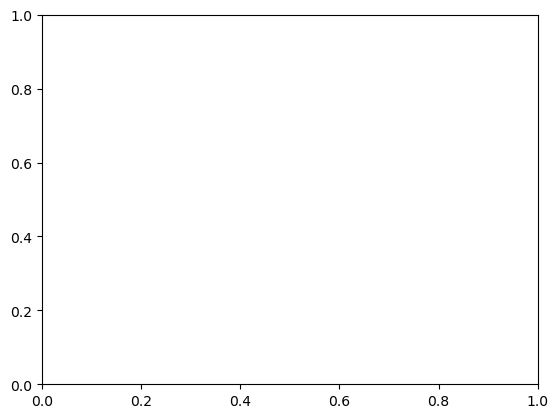

In [315]:
# Get the name of the most important feature
most_important_feature = top_feat_imp_df.iloc[0]['feature']

# Plot error vs the most important feature
error_analysis_df.plot.scatter(x=top_feat_imp_df['feature'], y='error', alpha=0.5)
plt.title(f'Error vs Top Feature: {most_important_feature}')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Do worse predictions occur for specific values of the important feature?
# For a categorical feature (one-hot encoded):
if error_analysis_df[most_important_feature].nunique() == 1: # Likely a one-hot feature
    avg_error_by_category = error_analysis_df.groupby(most_important_feature)['absolute_error'].mean()
    print(f"Average error by category '{most_important_feature}':")
    print(avg_error_by_category)

<h1>Feature Selection using ML</h1>

In [347]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

class FeatureSelector():
    def __init__(self, method='random_forest', threshold='median', random_state=42):
        self.method = method
        self.threshold = threshold
        self.random_state = random_state
        self.selector = None
        self.selected_features = None
        
    def fit(self, X, y):
        """Fit feature selector"""
        if self.method == 'random_forest':
            model = RandomForestRegressor(n_estimators=100, random_state=self.random_state, n_jobs=-1)
        elif self.method == 'xgboost':
            model = XGBRegressor(random_state=self.random_state, n_jobs=-1)
        elif self.method == 'lightgbm':
            model = LGBMRegressor(random_state=self.random_state, n_jobs=-1)
        elif self.method == 'lasso':
            model = Lasso(alpha=0.01, random_state=self.random_state)
        elif self.method == 'gradient_boosting':
            model = GradientBoostingRegressor(random_state=self.random_state)
        else:
            raise ValueError(f"Unknown method: {self.method}")
        
        self.selector = SelectFromModel(model, threshold=self.threshold)
        self.selector.fit(X, y)
        self.selected_features = self.selector.get_support()
        
        return self
    
    def transform(self, X):
        """Transform data to selected features"""
        if self.selector is None:
            raise ValueError("Feature selector not fitted yet")
        return self.selector.transform(X)
    
    def get_feature_importance(self, feature_names=None):
        """Get feature importance scores"""
        if self.selector is None:
            raise ValueError("Feature selector not fitted yet")
        
        if hasattr(self.selector.estimator_, 'feature_importances_'):
            importance = self.selector.estimator_.feature_importances_
        elif hasattr(self.selector.estimator_, 'coef_'):
            importance = np.abs(self.selector.estimator_.coef_)
        else:
            return None
        
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(len(importance))]
        
        return dict(zip(feature_names, importance))

In [330]:
from sklearn.pipeline import Pipeline


In [335]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])
col_pip=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat",col_pip , cat_cols )
    ])
pipeline_1 = Pipeline({
    ("preprocessor", preprocessor),
    ('feature_selector', FeatureSelector)
})

In [361]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Get the number of features
n_features = X_train.shape[1]

# Use column indices instead of names
numerical_features = list(range(n_features))  # All features are numerical

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler(with_centering=False))]), numerical_features)
    ]
)

# Now create the full pipeline with feature selection
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectFromModel(
        RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        threshold='median'
    ))
])

# Fit and transform
X_train_selected = pipeline.fit_transform(X_train, y_train)
X_test_selected = pipeline.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

Original features: 3460
Selected features: 1730


In [362]:
final_model = CatBoostRegressor(**best_params)

# Fit on your training data
final_model.fit(X_train_selected, y_train, verbose=False)

# Evaluate on test data
y_pred_test = final_model.predict(X_test_selected)



In [363]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse

100.75923869640472

<h1>Binning categorical columns</h1>

In [386]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [391]:
X_train.select_dtypes(include='object').index

Index([10863, 34583, 11958, 21373,  3241, 11764,  1029, 19463,  9366, 37578,
       ...
        1685, 16023, 21962, 37194, 16850,  6265, 11284, 38158,   860, 15795],
      dtype='int64', length=32784)

In [394]:
# If you have categorical columns identified
categorical_columns = X_train.select_dtypes(include='object').index

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_columns),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols)
    ]
)

# Then add to your full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectFromModel(
        RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        threshold='mean'
    ))
])
X_train_selected = pipeline.fit_transform(X_train_binned, y_train)
X_test_selected = pipeline.transform(X_test_binned)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [383]:
final_model = CatBoostRegressor(**best_params)

# Fit on your training data
final_model.fit(X_train_selected, y_train, verbose=False)

# Evaluate on test data
y_pred_test = final_model.predict(X_test_selected)


In [384]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse

152.51399510207256

In [382]:
mbe = mean_absolute_error(y_test, y_pred_test)
mbe

130.90945306197727